In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
from scipy.optimize import curve_fit
from skimage.measure import block_reduce
import sys
sys.path.insert(0,'..')
from dataloader import DataLoaderDALES, DataLoaderMicroHH
from functions import vint, Lv, cp, Rd

In [2]:
# Run specifics
# lp = '/Users/martinjanssens/Documents/Wageningen/Patterns-in-satellite-images/BOMEXStability/bomex200_e12/ppagg_ql'
# lp = '/Users/martinjanssens/Documents/Wageningen/Patterns-in-satellite-images/Botany/botany-7-1536/run_1/ppagg'
# lp = '/Users/martinjanssens/Documents/Wageningen/EUREC4A/moisture_circulation/eurec4a_100km_d4.4/ppagg_48hr_qr'
# lp = '/Users/martinjanssens/Documents/Wageningen/EUREC4A/moisture_circulation/eurec4a_200km/ppagg'
# lp = '/Users/martinjanssens/Documents/Wageningen/EUREC4A/moisture_circulation/eurec4a_100km_noclouds/ppagg'
# lp = '/Users/martinjanssens/Documents/Wageningen/EUREC4A/moisture_circulation/eurec4a_3101/ppagg'
# lp = '/Users/martinjanssens/Documents/Wageningen/EUREC4A/moisture_circulation/eurec4a_100km_heated_dried/ppagg'
# lp = '/Users/martinjanssens/Documents/Wageningen/EUREC4A/moisture_circulation/eurec4a_100km_ssthetero_x/ppagg'
# lp = '/Users/martinjanssens/Documents/Wageningen/EUREC4A/moisture_circulation/eurec4a_100km_qtpf/ppagg'
# lp = '/Users/martinjanssens/Documents/Wageningen/EUREC4A/moisture_circulation/eurec4a_100km_qtnudged/ppagg'

lp = '/Users/martinjanssens/Documents/Wageningen/EUREC4A/moisture_circulation/cases/eurec4a_balanced_100km/ppagg_dsc'

sp = lp+'/../figs_dsc'
print(sp)
mod = 'dales'

if mod == 'dales':
    dl = DataLoaderDALES(lp+'/..')
elif mod == 'microhh':
    dl = DataLoaderMicroHH(lp+'/..')
    
time1d = dl.time1d
rhobf = dl.rhobf

# Larger-scale processes
zf_inp = dl.zf_inp
wfls = dl.wfls
dqdt_ls = dl.dqdt_ls
dthldt_ls = dl.dthldt_ls

time = np.load(lp+'/time.npy')
plttime = np.load(lp+'/plttime.npy')
zflim = np.load(lp+'/zf.npy')

dzh = np.diff(zflim)[0] # FIXME only valid in lower part of domain

izmin = np.where(zflim[0] >= zf_inp)[0][0]
izmax = np.where(zflim[-1] <= zf_inp)[0][0]

rhobfi = rhobf[0,izmin:izmax] # Won't really change much through time, so ok to take 0 value

qtpf_moist_time = np.load(lp+'/qtpf_moist_time.npy')
qtpf_dry_time = np.load(lp+'/qtpf_dry_time.npy')
qtpf_prod_moist_time = np.load(lp+'/qtpf_prod_moist_time.npy')
qtpf_prod_dry_time = np.load(lp+'/qtpf_prod_dry_time.npy')
qtpf_prod_moist_wex_time = np.load(lp+'/qtpf_prod_moist_wex_time.npy')
qtpf_prod_dry_wex_time = np.load(lp+'/qtpf_prod_dry_wex_time.npy')
qtpf_vdiv_moist_time = np.load(lp+'/qtpf_vdiv_moist_time.npy')
qtpf_vdiv_dry_time = np.load(lp+'/qtpf_vdiv_dry_time.npy')
qtpf_hdiv_moist_time = np.load(lp+'/qtpf_hdiv_moist_time.npy')
qtpf_hdiv_dry_time = np.load(lp+'/qtpf_hdiv_dry_time.npy')
qtpf_subs_moist_time = np.load(lp+'/qtpf_subs_moist_time.npy')
qtpf_subs_dry_time = np.load(lp+'/qtpf_subs_dry_time.npy')
qtpf_diff_moist_time = np.load(lp+'/qtpf_diff_moist_time.npy')
qtpf_diff_dry_time = np.load(lp+'/qtpf_diff_dry_time.npy')
qtpf_micr_moist_time = np.load(lp+'/qtpf_micr_moist_time.npy')
qtpf_micr_dry_time = np.load(lp+'/qtpf_micr_dry_time.npy')

thlvpf_moist_time = np.load(lp+'/thlvpf_moist_time.npy')
thlvpf_dry_time = np.load(lp+'/thlvpf_dry_time.npy')
thlvpf_prod_moist_time = np.load(lp+'/thlvpf_prod_moist_time.npy')
thlvpf_prod_dry_time = np.load(lp+'/thlvpf_prod_dry_time.npy')
thlvpf_vdiv_moist_time = np.load(lp+'/thlvpf_vdiv_moist_time.npy')
thlvpf_vdiv_dry_time = np.load(lp+'/thlvpf_vdiv_dry_time.npy')
thlvpf_hdiv_moist_time = np.load(lp+'/thlvpf_hdiv_moist_time.npy')
thlvpf_hdiv_dry_time = np.load(lp+'/thlvpf_hdiv_dry_time.npy')
thlvpf_subs_moist_time = np.load(lp+'/thlvpf_subs_moist_time.npy')
thlvpf_subs_dry_time = np.load(lp+'/thlvpf_subs_dry_time.npy')
thlvpf_diff_moist_time = np.load(lp+'/thlvpf_diff_moist_time.npy')
thlvpf_diff_dry_time = np.load(lp+'/thlvpf_diff_dry_time.npy')
thlvpf_radi_moist_time = np.load(lp+'/thlvpf_radi_moist_time.npy')
thlvpf_radi_dry_time = np.load(lp+'/thlvpf_radi_dry_time.npy')
thlvpf_micr_moist_time = np.load(lp+'/thlvpf_micr_moist_time.npy')
thlvpf_micr_dry_time = np.load(lp+'/thlvpf_micr_dry_time.npy')

thlvpp_moist_time = np.load(lp+'/thlvpp_moist_time.npy')
thlvpp_dry_time = np.load(lp+'/thlvpp_dry_time.npy')
thlvpp_prod_moist_time = np.load(lp+'/thlvpp_prod_moist_time.npy')
thlvpp_prod_dry_time = np.load(lp+'/thlvpp_prod_dry_time.npy')
thlvpp_vdiv_moist_time = np.load(lp+'/thlvpp_vdiv_moist_time.npy')
thlvpp_vdiv_dry_time = np.load(lp+'/thlvpp_vdiv_dry_time.npy')
thlvpp_hdiv_moist_time = np.load(lp+'/thlvpp_hdiv_moist_time.npy')
thlvpp_hdiv_dry_time = np.load(lp+'/thlvpp_hdiv_dry_time.npy')
thlvpp_subs_moist_time = np.load(lp+'/thlvpp_subs_moist_time.npy')
thlvpp_subs_dry_time = np.load(lp+'/thlvpp_subs_dry_time.npy')
thlvpp_diff_moist_time = np.load(lp+'/thlvpp_diff_moist_time.npy')
thlvpp_diff_dry_time = np.load(lp+'/thlvpp_diff_dry_time.npy')

wthlvpf_prod_moist_time = np.load(lp+'/wthlvpf_prod_moist_time.npy')
wthlvpf_prod_dry_time =  np.load(lp+'/wthlvpf_prod_dry_time.npy')
wthlvpf_vdiv_moist_time =  np.load(lp+'/wthlvpf_vdiv_moist_time.npy')
wthlvpf_vdiv_dry_time = np.load(lp+'/wthlvpf_vdiv_dry_time.npy')
wthlvpf_hdiv_moist_time = np.load(lp+'/wthlvpf_hdiv_moist_time.npy')
wthlvpf_hdiv_dry_time = np.load(lp+'/wthlvpf_hdiv_dry_time.npy')
wthlvpf_buoy_moist_time = np.load(lp+'/wthlvpf_buoy_moist_time.npy')
wthlvpf_buoy_dry_time = np.load(lp+'/wthlvpf_buoy_dry_time.npy')
wthlvpf_pres_moist_time = np.load(lp+'/wthlvpf_pres_moist_time.npy')
wthlvpf_pres_dry_time = np.load(lp+'/wthlvpf_pres_dry_time.npy')
wthlvpf_subs_moist_time = np.load(lp+'/wthlvpf_subs_moist_time.npy')
wthlvpf_subs_dry_time = np.load(lp+'/wthlvpf_subs_dry_time.npy')
wthlvpf_diff_moist_time = np.load(lp+'/wthlvpf_diff_moist_time.npy')
wthlvpf_diff_dry_time = np.load(lp+'/wthlvpf_diff_dry_time.npy')

qlpf_vdiv_moist_time = np.load(lp+'/qlpf_vdiv_moist_time.npy')
qlpf_vdiv_dry_time = np.load(lp+'/qlpf_vdiv_dry_time.npy')

thl_av_time = np.load(lp+'/thl_av_time.npy')
thlv_av_time = np.load(lp+'/thlv_av_time.npy')
qt_av_time = np.load(lp+'/qt_av_time.npy')
qr_av_time = np.load(lp+'/qr_av_time.npy')

thlpf_moist_time = np.load(lp+'/thlpf_moist_time.npy')
thlpf_dry_time = np.load(lp+'/thlpf_dry_time.npy')
wff_moist_time = np.load(lp+'/wff_moist_time.npy')
wff_dry_time = np.load(lp+'/wff_dry_time.npy')
qlpf_moist_time = np.load(lp+'/qlpf_moist_time.npy') 
qlpf_dry_time = np.load(lp+'/qlpf_dry_time.npy')
qrpf_moist_time = np.load(lp+'/qrpf_moist_time.npy') 
qrpf_dry_time = np.load(lp+'/qrpf_dry_time.npy')

thlpp_moist_time = np.load(lp+'/thlpp_moist_time.npy')
thlpp_dry_time = np.load(lp+'/thlpp_dry_time.npy')
wfp_moist_time = np.load(lp+'/wfp_moist_time.npy')
wfp_dry_time = np.load(lp+'/wfp_dry_time.npy')
qlpp_moist_time = np.load(lp+'/qlpp_moist_time.npy') 
qlpp_dry_time = np.load(lp+'/qlpp_dry_time.npy')
qrpp_moist_time = np.load(lp+'/qrpp_moist_time.npy') 
qrpp_dry_time = np.load(lp+'/qrpp_dry_time.npy')

wthlp_av_time = np.load(lp+'/wthlp_av_time.npy')
wthlpf_moist_time = np.load(lp+'/wthlpf_moist_time.npy')
wthlpf_dry_time = np.load(lp+'/wthlpf_dry_time.npy')

wqtp_av_time = np.load(lp+'/wqtp_av_time.npy')
wqtpf_moist_time = np.load(lp+'/wqtpf_moist_time.npy')
wqtpf_dry_time = np.load(lp+'/wqtpf_dry_time.npy')

wqlp_av_time = np.load(lp+'/wqlp_av_time.npy')
wqlpf_moist_time = np.load(lp+'/wqlpf_moist_time.npy')
wqlpf_dry_time = np.load(lp+'/wqlpf_dry_time.npy')
wqlpf_l_moist_time = np.load(lp+'/wqlpf_l_moist_time.npy')
wqlpf_l_dry_time = np.load(lp+'/wqlpf_l_dry_time.npy')
wqlpf_c_moist_time = np.load(lp+'/wqlpf_c_moist_time.npy')
wqlpf_c_dry_time = np.load(lp+'/wqlpf_c_dry_time.npy')
wqlpf_r_moist_time = np.load(lp+'/wqlpf_r_moist_time.npy')
wqlpf_r_dry_time = np.load(lp+'/wqlpf_r_dry_time.npy')

wthlvp_av_time = np.load(lp+'/wthlvp_av_time.npy')
wthlvpf_moist_time = np.load(lp+'/wthlvpf_moist_time.npy')
wthlvpf_dry_time = np.load(lp+'/wthlvpf_dry_time.npy')
wthlvpf_l_moist_time = np.load(lp+'/wthlvpf_l_moist_time.npy')
wthlvpf_l_dry_time = np.load(lp+'/wthlvpf_l_dry_time.npy')
wthlvpf_c_moist_time = np.load(lp+'/wthlvpf_c_moist_time.npy')
wthlvpf_c_dry_time = np.load(lp+'/wthlvpf_c_dry_time.npy')
wthlvpf_r_moist_time = np.load(lp+'/wthlvpf_r_moist_time.npy')
wthlvpf_r_dry_time = np.load(lp+'/wthlvpf_r_dry_time.npy')
wthlvpp_moist_time = np.load(lp+'/wthlvpp_moist_time.npy')
wthlvpp_dry_time = np.load(lp+'/wthlvpp_dry_time.npy')

# Flux anomaly
wthlvpf_moist_anom = wthlvpf_moist_time - wthlvp_av_time
wthlvpf_dry_anom = wthlvpf_dry_time - wthlvp_av_time

wqlpf_moist_anom = wqlpf_moist_time - wqlp_av_time
wqlpf_dry_anom = wqlpf_dry_time - wqlp_av_time

# Buoyancy approximation
thvpf_moist_time = thlvpf_moist_time + 7*thl_av_time*qlpf_moist_time
thvpf_dry_time = thlvpf_dry_time + 7*thl_av_time*qlpf_dry_time

# Mean ql (we don't have this from stats3d)
ql_av_1d = dl.load_qlav(izmin, izmax)

# Slopes of mean profiles
Gamma_thlv = thlvpf_prod_moist_time/wff_moist_time[:,1:-1]
Gamma_qt = qtpf_prod_moist_wex_time/wff_moist_time[:,1:-1]

# Tendencies of variables of interest
def tderive(var,time):
    return ((var[1:,1:-1] - var[:-1,1:-1])
           /(time[1:,np.newaxis] - time[:-1,np.newaxis])/3600)


qtpf_tend_moist_time = np.zeros(qtpf_prod_moist_time.shape)
qtpf_tend_dry_time = np.zeros(qtpf_prod_moist_time.shape)
qtpf_tend_moist_time[1:,:] = tderive(qtpf_moist_time, time)
qtpf_tend_dry_time[1:,:] = tderive(qtpf_dry_time, time)

thlvpf_tend_moist_time = np.zeros(thlvpf_prod_moist_time.shape)
thlvpf_tend_dry_time = np.zeros(thlvpf_prod_moist_time.shape)
thlvpf_tend_moist_time[1:,:] = tderive(thlvpf_moist_time, time)
thlvpf_tend_dry_time[1:,:] = tderive(thlvpf_dry_time, time)

wthlvpf_tend_moist_time = np.zeros(wthlvpf_prod_moist_time.shape)
wthlvpf_tend_dry_time = np.zeros(wthlvpf_prod_moist_time.shape)
wthlvpf_tend_moist_time[1:,:] = tderive(wthlvpf_moist_anom, time)
wthlvpf_tend_dry_time[1:,:] = tderive(wthlvpf_dry_anom, time)


## Reconstruct slab-mean budget terms

thl_av_1d = dl.load_thlav(izmin, izmax)
qt_av_1d = dl.load_qtav(izmin, izmax)
thlv_av_1d = thl_av_1d*(1 + 0.608*qt_av_1d)

# Tendencies
ddt_thlv_av_time = tderive(thlv_av_1d, time1d/3600)
ddt_qt_av_time = tderive(qt_av_1d, time1d/3600)

# Flux divergence (approximately, i.e. ignoring rho)
wthl_av = dl.load_wthlav(izmin, izmax)
wqt_av = dl.load_wqtav(izmin, izmax)
wthlv_av = wthl_av + 0.608*thl_av_1d*wqt_av

ddz_wthlv_av_time = ((wthlv_av[:,1:] - wthlv_av[:,:-1])/dzh)
ddz_wqt_av_time = ((wqt_av[:,1:] - wqt_av[:,:-1])/dzh)

ddz_wthlv_av_time = (ddz_wthlv_av_time[:,1:] + ddz_wthlv_av_time[:,:-1])*0.5
ddz_wqt_av_time = (ddz_wqt_av_time[:,1:] + ddz_wqt_av_time[:,:-1])*0.5

# Subsidence
Gamma_thlv_1d = (thlv_av_1d[:,1:] - thlv_av_1d[:,:-1])/dzh
Gamma_thlv_1d = (Gamma_thlv_1d[:,1:] + Gamma_thlv_1d[:,:-1])/2.

Gamma_qt_1d = (qt_av_1d[:,1:] - qt_av_1d[:,:-1])/dzh
Gamma_qt_1d = (Gamma_qt_1d[:,1:] + Gamma_qt_1d[:,:-1])/2.

wfls_dthlvdz_av_time = wfls[izmin+1:izmax-1]*Gamma_thlv_1d
wfls_dqtdz_av_time = wfls[izmin+1:izmax-1]*Gamma_qt_1d

# Precipitation
dqdt_prec = dl.load_prec(izmin, izmax)
presh = dl.load_presh(0, izmin, izmax)
exnh = (presh/1e5)**(Rd/cp)
exnf = (exnh[1:] + exnh[:-1])*0.5
dthlvdt_prec = (0.608*thl_av_1d[:,1:-1] - Lv/cp/exnf[np.newaxis,:-1]) * dqdt_prec[:,1:-1]

# Radiation
dthlvdt_radi = dl.load_radi(izmin, izmax)

# Large scale warming
dqdt_ls = dqdt_ls[izmin:izmax]
dthldt_ls = dthldt_ls[izmin:izmax]
dthlvdt_ls = dthldt_ls + 0.608*thl_av_1d*dqdt_ls

/Users/martinjanssens/Documents/Wageningen/EUREC4A/moisture_circulation/cases/eurec4a_balanced_100km/ppagg_dsc/../figs_dsc
Initialising dataloader...
Set paths to all datasets and extracted dimensions


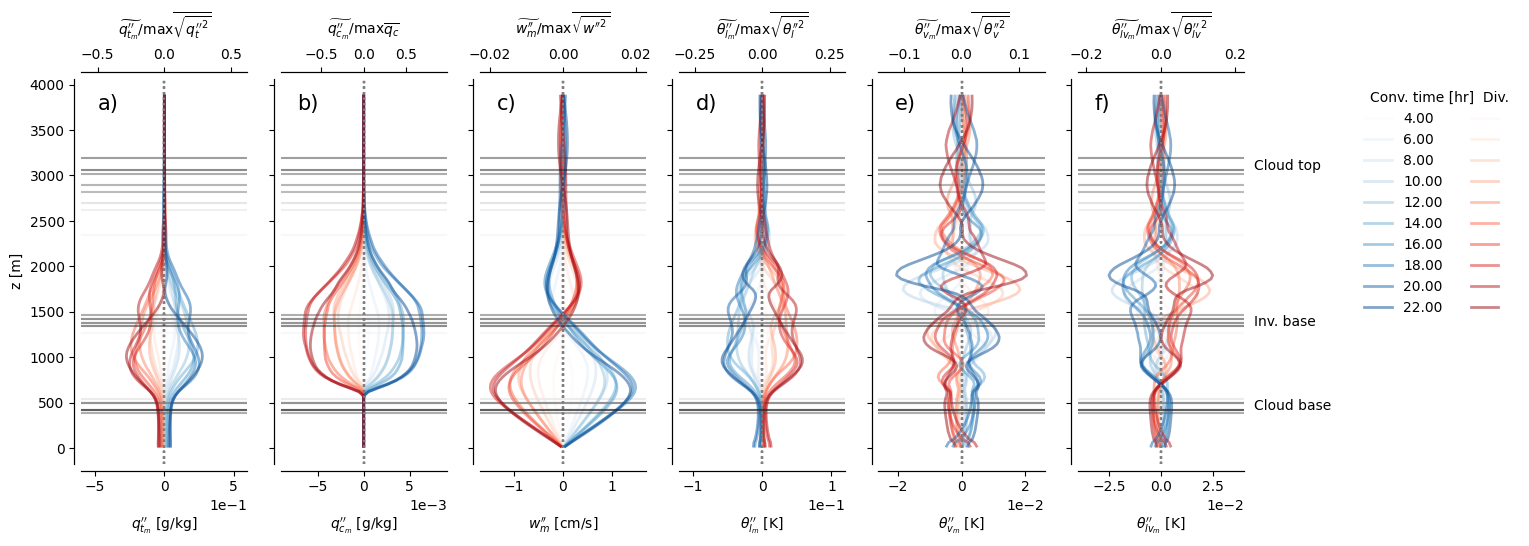

In [4]:
#%% Plotprofiles of  mesoscale-filtered variables in time
tpltmin = 4.
tpltmax = 24.
dit = 2.0 # Rounds to closest multiple of dt in time
dtav = 2.0 # Around each plotted time step
alpha = 0.5
lw=2
fm = 1e3 # convert kg/kg -> g/kg
fw = 1e2 # convert m/s -> cm/s

# update_fontsizes(14, 17, 16)

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1
idtplt = int(round(dit/(time[plttime[1]]-time[plttime[0]])))
idtav  = int(round(dtav/2/(time[1]-time[0])))
idtav1 = int(round(dtav/2/(time1d[1]-time1d[0])*3600))
plttime_var = np.arange(itpltmin,itpltmax,idtplt)

def add_twinx(ax, norm, offset, label, return_axs=False, pad=None):
    ax2 = ax.twiny()
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')
    ax2.spines['top'].set_position(('axes',offset))
    ax2.set_xlim((ax.get_xlim()[0]/norm,ax.get_xlim()[1]/norm))
    ax2.set_xlabel(label, labelpad=pad)
    if return_axs:
        return ax2

ax2offs=1.0
fig,axs = plt.subplots(ncols=6,sharey=True,figsize=(15,5))
for i in range(len(plttime_var)):
    ti = time[plttime_var[i]]
    
    colm = plt.cm.Blues(i/len(plttime_var))
    cold = plt.cm.Reds(i/len(plttime_var))
    colc = plt.cm.Greys(i/len(plttime_var))
    
    it1d = np.argmin(abs(ti-time1d/3600))
    
    ql_avi = np.mean(ql_av_1d[it1d-idtav1:it1d+idtav1],axis=0)
    z_cb = zflim[ql_avi>0][1]
    
    z_ib = zflim[np.argmin(np.mean(wthlv_av[it1d-idtav1:it1d+idtav1],axis=0))]
    
    z_ct = zflim[ql_avi>0][-10]
    
    axs[0].plot(np.mean(fm*qtpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim, 
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[0].plot(np.mean(fm*qtpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[0].axvline(0,color='gray',linestyle='dotted')
    axs[0].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[0].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[0].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[0].annotate('a)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[0].set_xlabel(r"$q_{t_m}''$ [g/kg]", labelpad=15)
        axs[0].set_xlim((-6e-4*fm,6e-4*fm))
        axs[0].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        qt2max = np.max(np.sqrt(dl.load_qt2av(izmin,izmax)[it1d]))*fm
        add_twinx(axs[0], qt2max, ax2offs, r"$\widetilde{q_{t_m}''}/\max \overline{\sqrt{q_t''^2}}$", pad=10)

    axs[1].plot(np.mean(fm*qlpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[1].plot(np.mean(fm*qlpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[1].axvline(0,color='gray',linestyle='dotted')
    axs[1].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[1].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[1].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[1].annotate('b)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[1].set_xlabel(r"$q_{c_m}''$ [g/kg]", labelpad=15)
        axs[1].set_xlim((-9e-6*fm,9e-6*fm))
        axs[1].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        add_twinx(axs[1], np.max(ql_av_1d)*fm, ax2offs, r"$\widetilde{q_{c_m}''}/\max \overline{q_c}$", pad=10)

    axs[2].plot(np.mean(fw*wff_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[2].plot(np.mean(fw*wff_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[2].axvline(0,color='gray',linestyle='dotted')
    axs[2].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[2].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[2].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[2].annotate('c)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[2].set_xlabel(r"$w_m''$ [cm/s]", labelpad=15)
        axs[2].set_xlim((-1.7e-2*fw,1.7e-2*fw))
        axs[2].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        w2max = np.max(np.sqrt(dl.load_w2tav(izmin,izmax)[it1d]))*fw
        add_twinx(axs[2], w2max, ax2offs, r"$\widetilde{w_m''}/\max \overline{\sqrt{w''^2}}$", pad=10)

    axs[3].plot(np.mean(thlpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[3].plot(np.mean(thlpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[3].axvline(0,color='gray',linestyle='dotted')
    axs[3].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[3].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[3].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[3].annotate('d)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[3].set_xlabel(r"$\theta_{l_m}''$ [K]", labelpad=15)
        axs[3].set_xlim((-1.2e-1,1.2e-1))
        axs[3].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        thl2max = np.max(np.sqrt(dl.load_thl2av(izmin,izmax)[it1d]))
        axs32 = add_twinx(axs[3], thl2max, ax2offs, r"$\widetilde{\theta_{l_m}''}/\max \overline{\sqrt{\theta_l''^2}}$", return_axs=True, pad=10)
        # axs32.ticklabel_format(style='sci',axis='x',scilimits=(0,0))

    axs[4].plot(np.mean(thvpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[4].plot(np.mean(thvpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[4].axvline(0,color='gray',linestyle='dotted')
    axs[4].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[4].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[4].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == 0:
        axs[4].annotate('e)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[4].set_xlabel(r"$\theta_{v_m}''$ [K]", labelpad=15)
        axs[4].set_xlim((-2.6e-2,2.6e-2))
        axs[4].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        thv2max = np.max(np.sqrt(dl.load_thv2av(izmin,izmax)[it1d]))
        axs42 = add_twinx(axs[4], thv2max, ax2offs, r"$\widetilde{\theta_{v_m}''}/\max \overline{\sqrt{\theta_v''^2}}$", return_axs=True, pad=10)
        # axs42.ticklabel_format(style='sci',axis='x',scilimits=(0,0))
    
    axs[5].plot(np.mean(thlvpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                label='%.2f'%ti,color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[5].plot(np.mean(thlvpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                label=' ',color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[5].axvline(0,color='gray',linestyle='dotted')
    axs[5].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[5].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[5].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[5].annotate('f)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[5].set_xlabel(r"$\theta_{lv_m}''$ [K]", labelpad=15)
        axs[5].set_xlim((-4e-2,4e-2))
        axs[5].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        axs52 = add_twinx(axs[5], thv2max, ax2offs, r"$\widetilde{\theta_{lv_m}''}/\max \overline{\sqrt{\theta_{lv}''^2}}$", return_axs=True, pad=10)
        # axs52.ticklabel_format(style='sci',axis='x',scilimits=(0,0))

axs[0].set_ylabel('z [m]')
axs[5].annotate(r"Cloud base",(4.5e-2,z_cb),annotation_clip=False)
axs[5].annotate(r"Inv. base",(4.5e-2,z_ib),annotation_clip=False)
axs[5].annotate(r"Cloud top",(4.5e-2,z_ct),annotation_clip=False)
handles, labels = axs[5].get_legend_handles_labels()
handm = handles[::2];  labsm = labels[::2]
handd = handles[1::2]; labsd = labels[1::2]
handles = np.concatenate((handm,handd))
labels  = np.concatenate((labsm,labsd))
axs[5].legend(handles, labels, loc='best',bbox_to_anchor=(1.65,1),
              ncol=2,title='Conv. time [hr]  Div.',frameon=False)
sns.despine(offset=5, top=False)
plt.savefig(sp+'/vars_meso_evo.pdf', bbox_inches='tight')

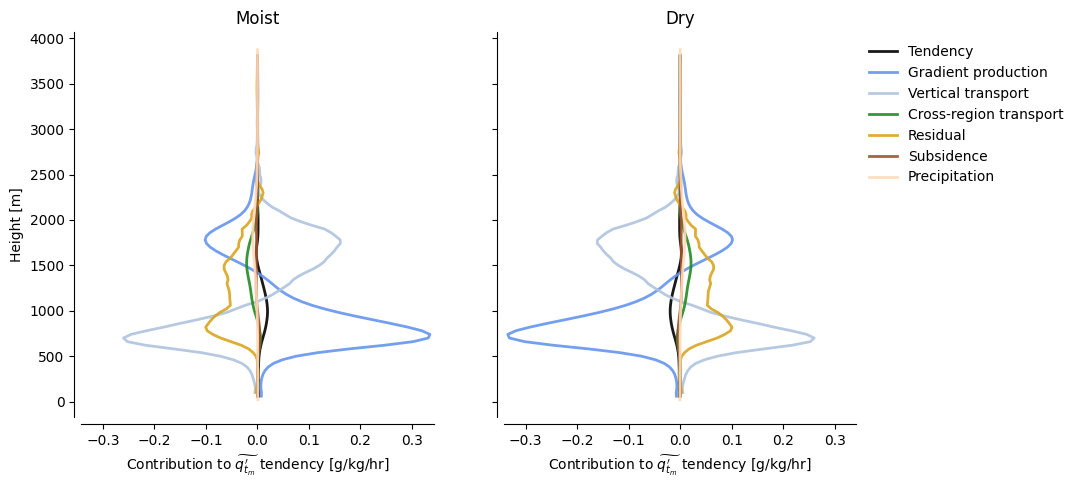

In [4]:
#%% Average budget contributions over time dimension
tpltmin = 6.
tpltmax = 24.

terms = ['Tendency              ',
         'Gradient production',
         'Vertical transport',
         'Cross-region transport',
         'Residual',
         'Subsidence',
         'Precipitation',
         'SFS diffusion',
         ]

colors = ['black',
          'cornflowerblue',
          'lightsteelblue',
          'forestgreen',
          'goldenrod',
          'sienna',
          'peachpuff'
          ]

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

qtpfmn_tend_moist = np.mean(qtpf_tend_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_moist_wex = np.mean(qtpf_prod_moist_wex_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_vdiv_moist = np.mean(qtpf_vdiv_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_hdiv_moist = np.mean(qtpf_hdiv_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_subs_moist = np.mean(qtpf_subs_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_micr_moist = np.mean(qtpf_micr_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_diff_moist = np.mean(qtpf_diff_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_budg_moist = (-qtpfmn_prod_moist_wex[1:-1] - qtpfmn_vdiv_moist[1:-1]
                     -qtpfmn_hdiv_moist[1:-1] - qtpfmn_subs_moist[1:-1]
                      +qtpfmn_diff_moist + qtpfmn_micr_moist[2:-2])
qtpfmn_resi_moist = qtpfmn_tend_moist[1:-1] - qtpfmn_budg_moist

# Subsume the diffusion under vertical transport
qtpfmn_vdiv_moist = qtpfmn_vdiv_moist[1:-1]-qtpfmn_diff_moist


qtpfmn_tend_dry = np.mean(qtpf_tend_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_dry_wex = np.mean(qtpf_prod_dry_wex_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_vdiv_dry = np.mean(qtpf_vdiv_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_hdiv_dry = np.mean(qtpf_hdiv_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_subs_dry = np.mean(qtpf_subs_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_micr_dry = np.mean(qtpf_micr_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_diff_dry = np.mean(qtpf_diff_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_budg_dry = (-qtpfmn_prod_dry_wex[1:-1] - qtpfmn_vdiv_dry[1:-1]
                     -qtpfmn_hdiv_dry[1:-1] - qtpfmn_subs_dry[1:-1]
                      +qtpfmn_diff_dry + qtpfmn_micr_dry[2:-2])
qtpfmn_resi_dry = qtpfmn_tend_dry[1:-1] - qtpfmn_budg_dry
qtpfmn_vdiv_dry = qtpfmn_vdiv_dry[1:-1]-qtpfmn_diff_dry

alpha = 0.9
lw = 2
fq = 1e3*3600 # kg/kg/s => g/kg/hr

fig,axs = plt.subplots(ncols=2,sharey=True,figsize=(10,5))
axs[0].plot(qtpfmn_tend_moist*fq, zflim[1:-1],c=colors[0],alpha=alpha,lw=lw)
axs[0].plot(-qtpfmn_prod_moist_wex*fq, zflim[1:-1],c=colors[1],alpha=alpha,lw=lw)
axs[0].plot(-qtpfmn_vdiv_moist*fq, zflim[2:-2],c=colors[2],alpha=alpha,lw=lw)
axs[0].plot(-qtpfmn_hdiv_moist*fq, zflim[1:-1],c=colors[3],alpha=alpha,lw=lw)
axs[0].plot(qtpfmn_resi_moist*fq, zflim[2:-2],c=colors[4],alpha=alpha,lw=lw)
axs[0].plot(-qtpfmn_subs_moist*fq, zflim[1:-1],c=colors[5],alpha=alpha,lw=lw)
axs[0].plot(qtpfmn_micr_moist*fq, zflim,c=colors[6],alpha=alpha,lw=lw)
axs[0].set_xlabel(r"Contribution to $\widetilde{q_{t_m}'}$ tendency [g/kg/hr]")
axs[0].set_xlim((-9.5e-8*fq,9.5e-8*fq))
axs[0].set_title('Moist')

axs[1].plot(qtpfmn_tend_dry*fq, zflim[1:-1],c=colors[0],label=terms[0],alpha=alpha,lw=lw)
axs[1].plot(-qtpfmn_prod_dry_wex*fq, zflim[1:-1],c=colors[1],label=terms[1],alpha=alpha,lw=lw)
axs[1].plot(-qtpfmn_vdiv_dry*fq, zflim[2:-2],c=colors[2],label=terms[2],alpha=alpha,lw=lw)
axs[1].plot(-qtpfmn_hdiv_dry*fq, zflim[1:-1],c=colors[3],label=terms[3],alpha=alpha,lw=lw)
axs[1].plot(qtpfmn_resi_dry*fq, zflim[2:-2],c=colors[4],label=terms[4],alpha=alpha,lw=lw)
axs[1].plot(-qtpfmn_subs_dry*fq, zflim[1:-1],c=colors[5],label=terms[5],alpha=alpha,lw=lw)
axs[1].plot(qtpfmn_micr_dry*fq, zflim,c=colors[6],label=terms[6],alpha=alpha,lw=lw)
axs[1].set_xlabel(r"Contribution to $\widetilde{q_{t_m}'}$ tendency [g/kg/hr]")
axs[1].set_xlim((-9.5e-8*fq,9.5e-8*fq))
axs[1].set_title('Dry')

axs[0].set_ylabel(r'Height [m]')
axs[1].legend(loc='upper left',bbox_to_anchor=(1,1), frameon=False)
sns.despine(offset=5)

plt.savefig(sp+'/qtpf_budget.pdf',bbox_inches='tight')

/var/folders/2v/kjs6dspj31v39dztjqjqb_ym0000gn/T/ipykernel_11225/807829412.py:93: RuntimeWarning: divide by zero encountered in true_divide
  Gamrat = Gamma_qt/Gamma_thlv


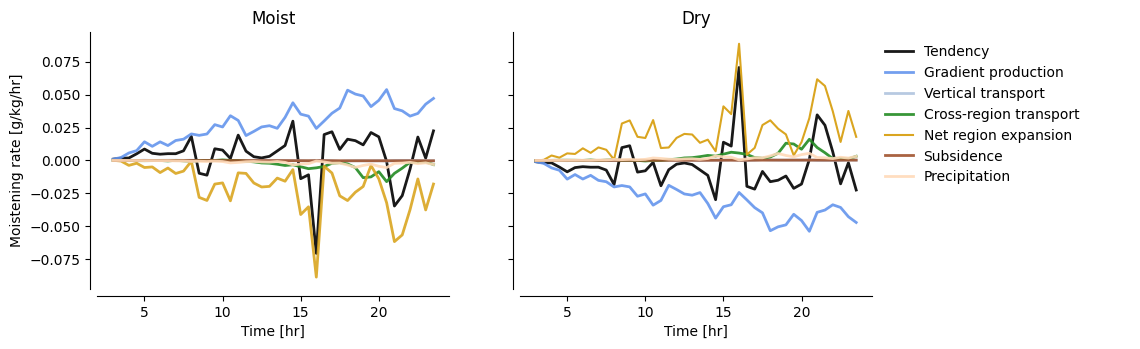

In [5]:
#%% Vertically integrated statistics
tpltmin = 3.
tpltmax = 24.
dit = 0.5 # Rounds to closest multiple of dt in time
dtav = 1.0 # Average around each plotted time step
alpha = 0.9
lw=2
fq=1e3*3600 # kg/kg/s => g/kg/hr

# Model
C = 0.3
thl0 = 299.1

terms = ['Tendency                               ',
         'Gradient production',
         'Vertical transport',
         'Cross-region transport',
         'Net region expansion',
         'Subsidence',
         'Precipitation',
         'SFS diffusion',
         'Linear instability model'
         ]

colors = ['black',
          'cornflowerblue',
          'lightsteelblue',
          'forestgreen',
          'goldenrod',
          'sienna',
          'peachpuff'
          ]

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1
idtplt = int(round(dit/(time[plttime[1]]-time[plttime[0]])))
idtav  = int(round(dtav/2/(time[1]-time[0])))
plttime_var = np.arange(itpltmin,itpltmax,idtplt)
  
# 1D fields
rhobfi = rhobf[0,izmin:izmax] # Won't really change much through time, so ok to take 0 value

qtpfi_moist = vint(qtpf_moist_time,rhobfi,zflim,plttime_var,norm=True)
qtpfi_dry = vint(qtpf_dry_time,rhobfi,zflim,plttime_var,norm=True)

# Tendency
qtpfi_tend_moist = vint(qtpf_tend_moist_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)
qtpfi_tend_dry = vint(qtpf_tend_dry_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)

# Moistening gradient production per simplified WTG budget
qtpfi_prod_moist = vint(qtpf_prod_moist_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)
qtpfi_prod_dry = vint(qtpf_prod_dry_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)

qtpfi_prod_wex_moist = vint(qtpf_prod_moist_wex_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)
qtpfi_prod_wex_dry = vint(qtpf_prod_dry_wex_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)

# Moistening through anomalous vertical small-scale fluxes
# FIXME not so clean - offset zf in integration by 1 from field
qtpfi_vdiv_moist = vint(qtpf_vdiv_moist_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)
qtpfi_vdiv_dry = vint(qtpf_vdiv_dry_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)

# Moistening through horizontal advection
qtpfi_hdiv_moist = vint(qtpf_hdiv_moist_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)
qtpfi_hdiv_dry = vint(qtpf_hdiv_dry_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)

# Moistening through subsidence
qtpfi_subs_moist = vint(qtpf_subs_moist_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)
qtpfi_subs_dry = vint(qtpf_subs_dry_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)

# Moistening through precipitation
qtpfi_micr_moist = vint(qtpf_micr_moist_time,rhobfi,zflim,plttime_var,norm=True)
qtpfi_micr_dry = vint(qtpf_micr_dry_time,rhobfi,zflim,plttime_var,norm=True)

# Moistening through SFS diffusion
qtpfi_diff_moist = vint(qtpf_diff_moist_time,rhobfi[2:-2],zflim[2:-2],plttime_var,norm=True)
qtpfi_diff_dry = vint(qtpf_diff_dry_time,rhobfi[2:-2],zflim[2:-2],plttime_var,norm=True)

# Estimate residual
qtpfi_resid_moist = qtpfi_tend_moist + qtpfi_prod_wex_moist + qtpfi_vdiv_moist + qtpfi_hdiv_moist + qtpfi_subs_moist - qtpfi_micr_moist #- qtpfi_diff_moist
qtpfi_resid_dry = qtpfi_tend_dry + qtpfi_prod_wex_dry + qtpfi_vdiv_dry + qtpfi_hdiv_dry + qtpfi_subs_dry - qtpfi_micr_dry #- qtpfi_diff_dry

# Include diffusion in vertical transport
qtpfi_vdiv_moist = qtpfi_vdiv_moist - qtpfi_diff_moist
qtpfi_vdiv_dry = qtpfi_vdiv_dry - qtpfi_diff_dry

# Add simple linear instability model
zwmax = 500
izwmax = np.where(zflim>zwmax)[0][0]
w2 = dl.load_w2tav(izmin, izmax)
wstar = np.sqrt(np.mean(w2[:,:izwmax]))

# gammas
Gamrat = Gamma_qt/Gamma_thlv
Gamratz = (Gamrat[:,1:] - Gamrat[:,:-1])/(zflim[1] - zflim[0])
Gamratz_pl = np.mean(Gamratz[itpltmin:itpltmax,:],axis=0)
Gamratz_mn = np.mean(Gamratz_pl[20:40]) # Cloud-layer average

# Model
tref = 8. # Reference time for model constant
itref = np.argmin(np.abs(time-tref))
itrefvar = np.argmin(np.abs(time[plttime_var]-tref))
tau = 1. / (C*thl0*wstar*Gamratz_mn)
qtpfi0_moist = qtpfi_moist[itrefvar]
qtpfi0_dry = qtpfi_dry[itrefvar]

qtpfi_tend_moist_mod = qtpfi0_moist/tau*np.exp((time[plttime_var]-time[itref])*3600/tau)
qtpfi_tend_dry_mod = qtpfi0_dry/tau*np.exp((time[plttime_var]-time[itref])*3600/tau)

# Temporal plot
fig,axs = plt.subplots(ncols=2,sharey=True,figsize=(10,10/3))
axs[0].plot(time[plttime_var],fq*qtpfi_tend_moist,c=colors[0],alpha=alpha,lw=lw)
axs[0].plot(time[plttime_var],fq*-qtpfi_prod_wex_moist,c=colors[1],alpha=alpha,lw=lw)
axs[0].plot(time[plttime_var],fq*-qtpfi_vdiv_moist,c=colors[2],alpha=alpha,lw=lw)
axs[0].plot(time[plttime_var],fq*-qtpfi_hdiv_moist,c=colors[3],alpha=alpha,lw=lw)
axs[0].plot(time[plttime_var],fq*qtpfi_resid_moist,c=colors[4],alpha=alpha,lw=lw)
axs[0].plot(time[plttime_var],fq*-qtpfi_subs_moist,c=colors[5],alpha=alpha,lw=lw)
axs[0].plot(time[plttime_var],fq*qtpfi_micr_moist,c=colors[6],alpha=alpha,lw=lw)
# axs[0].plot(time[plttime_var],fq*qtpfi_tend_moist_mod,c=colors[0],alpha=alpha,lw=lw,linestyle='--')
axs[0].set_xlabel('Time [hr]')
axs[0].set_title('Moist')

axs[1].plot(time[plttime_var],fq*qtpfi_tend_dry,c=colors[0],label=terms[0],alpha=alpha,lw=lw)
axs[1].plot(time[plttime_var],fq*-qtpfi_prod_wex_dry,c=colors[1],label=terms[1],alpha=alpha,lw=lw)
axs[1].plot(time[plttime_var],fq*-qtpfi_vdiv_dry,c=colors[2],label=terms[2],alpha=alpha,lw=lw)
axs[1].plot(time[plttime_var],fq*-qtpfi_hdiv_dry,c=colors[3],label=terms[3],alpha=alpha,lw=lw)
axs[1].plot(time[plttime_var],fq*qtpfi_resid_dry,c=colors[4],label=terms[4])
axs[1].plot(time[plttime_var],fq*-qtpfi_subs_dry,c=colors[5],label=terms[5],alpha=alpha,lw=lw)
axs[1].plot(time[plttime_var],fq*qtpfi_micr_dry,c=colors[6],label=terms[6],alpha=alpha,lw=lw)
# axs[1].plot(time[plttime_var],fq*qtpfi_tend_dry_mod,c=colors[0],label=terms[-1],alpha=alpha,lw=lw,linestyle='--')
axs[1].set_xlabel('Time [hr]')
axs[1].set_title('Dry')

axs[0].set_ylabel('Moistening rate [g/kg/hr]')
axs[1].legend(loc='best',bbox_to_anchor=(1,1), frameon=False)
sns.despine(offset=5)
plt.savefig(sp+'/qtpf_budget_int.pdf',bbox_inches='tight')

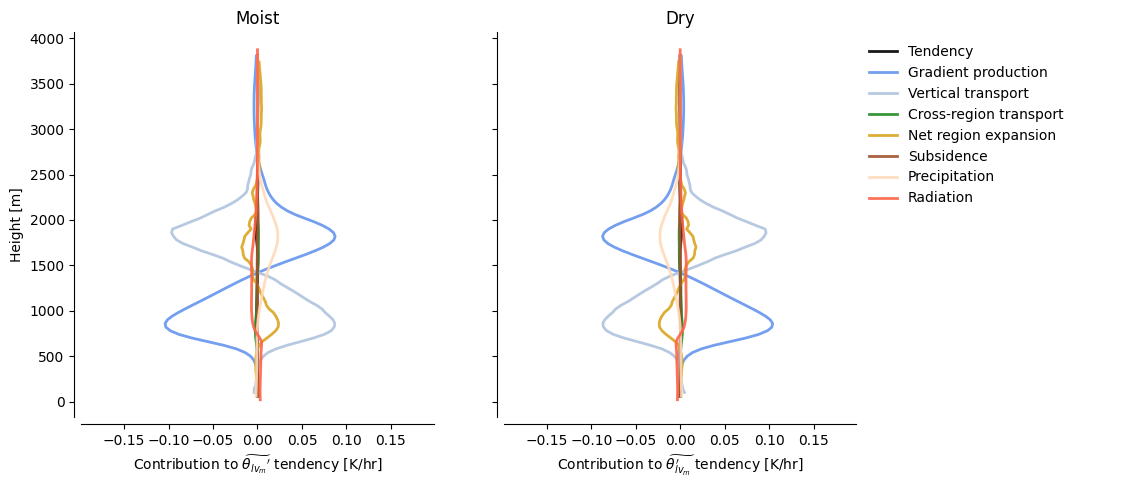

In [6]:
#%% Average thlvpf budget contributions over time dimension
tpltmin = 6.
tpltmax = 24.

ft = 3600 # K/s => K/hr
alpha = 0.9

terms = ['Tendency                               ',
         'Gradient production',
         'Vertical transport',
         'Cross-region transport',
         'Net region expansion',
         'Subsidence',
         'Precipitation',
         'Radiation',
         'SFS diffusion'
         ]

colors = ['black',
          'cornflowerblue',
          'lightsteelblue',
          'forestgreen',
          'goldenrod',
          'sienna',
          'peachpuff',
          'tomato'
          ]

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

thlvpfmn_tend_moist = np.mean(thlvpf_tend_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_prod_moist = np.mean(thlvpf_prod_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_vdiv_moist = np.mean(thlvpf_vdiv_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_hdiv_moist = np.mean(thlvpf_hdiv_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_subs_moist = np.mean(thlvpf_subs_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_micr_moist = np.mean(thlvpf_micr_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_radi_moist = np.mean(thlvpf_radi_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_diff_moist = np.mean(thlvpf_diff_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_budg_moist = (-thlvpfmn_prod_moist[1:-1] - thlvpfmn_vdiv_moist[1:-1]
                       -thlvpfmn_hdiv_moist[1:-1] - thlvpfmn_subs_moist[1:-1]
                       +thlvpfmn_micr_moist[1:-1] + thlvpfmn_radi_moist[2:-2]
                       +thlvpfmn_diff_moist)
thlvpfmn_resi_moist = thlvpfmn_tend_moist[1:-1] - thlvpfmn_budg_moist

# Absorb resdiual in vertical flux, as its numerical integration errors
# are probably larger than the region expansion effect
# thlvpfmn_vdiv_moist = thlvpfmn_vdiv_moist[1:-1] - thlvpfmn_resi_moist
# thlvpfmn_resi_moist = np.zeros(thlvpfmn_resi_moist.shape)

thlvpfmn_vdiv_moist = thlvpfmn_vdiv_moist[1:-1] - thlvpfmn_diff_moist

thlvpfmn_tend_dry = np.mean(thlvpf_tend_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_prod_dry = np.mean(thlvpf_prod_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_vdiv_dry = np.mean(thlvpf_vdiv_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_hdiv_dry = np.mean(thlvpf_hdiv_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_subs_dry = np.mean(thlvpf_subs_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_micr_dry = np.mean(thlvpf_micr_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_radi_dry = np.mean(thlvpf_radi_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_diff_dry = np.mean(thlvpf_diff_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_budg_dry = (-thlvpfmn_prod_dry[1:-1] - thlvpfmn_vdiv_dry[1:-1]
                     -thlvpfmn_hdiv_dry[1:-1] - thlvpfmn_subs_dry[1:-1]
                     +thlvpfmn_micr_dry[1:-1]+ thlvpfmn_radi_dry[2:-2]
                     +thlvpfmn_diff_dry)
thlvpfmn_resi_dry = thlvpfmn_tend_dry[1:-1] - thlvpfmn_budg_dry

# thlvpfmn_vdiv_dry = thlvpfmn_vdiv_dry[1:-1] - thlvpfmn_resi_dry
# thlvpfmn_resi_dry = np.zeros(thlvpfmn_resi_dry.shape)

thlvpfmn_vdiv_dry = thlvpfmn_vdiv_dry[1:-1] - thlvpfmn_diff_dry

fig,axs = plt.subplots(ncols=2,sharey=True,figsize=(10,5))
axs[0].plot(ft*thlvpfmn_tend_moist, zflim[1:-1],c=colors[0],alpha=alpha,lw=lw)
axs[0].plot(ft*-thlvpfmn_prod_moist, zflim[1:-1],c=colors[1],alpha=alpha,lw=lw)
axs[0].plot(ft*-thlvpfmn_vdiv_moist, zflim[2:-2],c=colors[2],alpha=alpha,lw=lw)
axs[0].plot(ft*-thlvpfmn_hdiv_moist, zflim[1:-1],c=colors[3],alpha=alpha,lw=lw)
axs[0].plot(ft* thlvpfmn_resi_moist, zflim[2:-2],c=colors[4],alpha=alpha,lw=lw)
axs[0].plot(ft*-thlvpfmn_subs_moist, zflim[1:-1],c=colors[5],alpha=alpha,lw=lw)
axs[0].plot(ft*thlvpfmn_micr_moist, zflim[1:-1],c=colors[6],alpha=alpha,lw=lw)
axs[0].plot(ft*thlvpfmn_radi_moist, zflim,c=colors[7],alpha=alpha,lw=lw)
# axs[0].plot( thlvpfmn_diff_moist, zflim[2:-2],c=colors[5],alpha=alpha,lw=lw)
axs[0].set_xlabel(r"Contribution to $\widetilde{\theta_{lv_m}}'$ tendency [K/hr]")
axs[0].set_xlim((ft*-5.5e-5,ft*5.5e-5))
axs[0].set_title('Moist')

axs[1].plot(ft*thlvpfmn_tend_dry, zflim[1:-1],c=colors[0],label=terms[0],alpha=alpha,lw=lw)
axs[1].plot(ft*-thlvpfmn_prod_dry, zflim[1:-1],c=colors[1],label=terms[1],alpha=alpha,lw=lw)
axs[1].plot(ft*-thlvpfmn_vdiv_dry, zflim[2:-2],c=colors[2],label=terms[2],alpha=alpha,lw=lw)
axs[1].plot(ft*-thlvpfmn_hdiv_dry, zflim[1:-1],c=colors[3],label=terms[3],alpha=alpha,lw=lw)
axs[1].plot(ft* thlvpfmn_resi_dry, zflim[2:-2],c=colors[4],label=terms[4],alpha=alpha,lw=lw)
axs[1].plot(ft*-thlvpfmn_subs_dry, zflim[1:-1],c=colors[5],label=terms[5],alpha=alpha,lw=lw)
axs[1].plot(ft*thlvpfmn_micr_dry, zflim[1:-1],c=colors[6],label=terms[6],alpha=alpha,lw=lw)
axs[1].plot(ft*thlvpfmn_radi_dry, zflim,c=colors[7],label=terms[7],alpha=alpha,lw=lw)
# axs[1].plot (thlvpfmn_diff_dry, zflim[2:-2],c=colors[5],label=terms[5],alpha=alpha,lw=lw)
axs[1].set_xlabel(r"Contribution to $\widetilde{\theta_{lv_m}'}$ tendency [K/hr]")
axs[1].set_xlim((ft*-5.5e-5,ft*5.5e-5))
axs[1].set_title('Dry')

axs[0].set_ylabel(r'Height [m]')
axs[1].legend(loc='best',bbox_to_anchor=(1,1), frameon=False)

sns.despine(offset=5)

plt.savefig(sp+'/thlvpf_budget.pdf',bbox_inches='tight')

/var/folders/2v/kjs6dspj31v39dztjqjqb_ym0000gn/T/ipykernel_11225/2036694045.py:54: RuntimeWarning: divide by zero encountered in true_divide
  wff_moist_wtg = -thlvpf_vdiv_moist/Gamma_thlv[:,1:-1]
/var/folders/2v/kjs6dspj31v39dztjqjqb_ym0000gn/T/ipykernel_11225/2036694045.py:55: RuntimeWarning: divide by zero encountered in true_divide
  wff_dry_wtg = -thlvpf_vdiv_dry/Gamma_thlv[:,1:-1]
/var/folders/2v/kjs6dspj31v39dztjqjqb_ym0000gn/T/ipykernel_11225/2036694045.py:74: RuntimeWarning: divide by zero encountered in true_divide
  wff_moist_thl = -thlpf_vdiv_moist_time/Gamma_thl_f
/var/folders/2v/kjs6dspj31v39dztjqjqb_ym0000gn/T/ipykernel_11225/2036694045.py:75: RuntimeWarning: divide by zero encountered in true_divide
  wff_dry_thl = -thlpf_vdiv_dry_time/Gamma_thl_f
/var/folders/2v/kjs6dspj31v39dztjqjqb_ym0000gn/T/ipykernel_11225/2036694045.py:81: RuntimeWarning: invalid value encountered in true_divide
  wff_moist_ql = 7*thl_av_time[:,1:-1]*qlpf_vdiv_moist_time/Gamma_thl_f
/var/folders/2

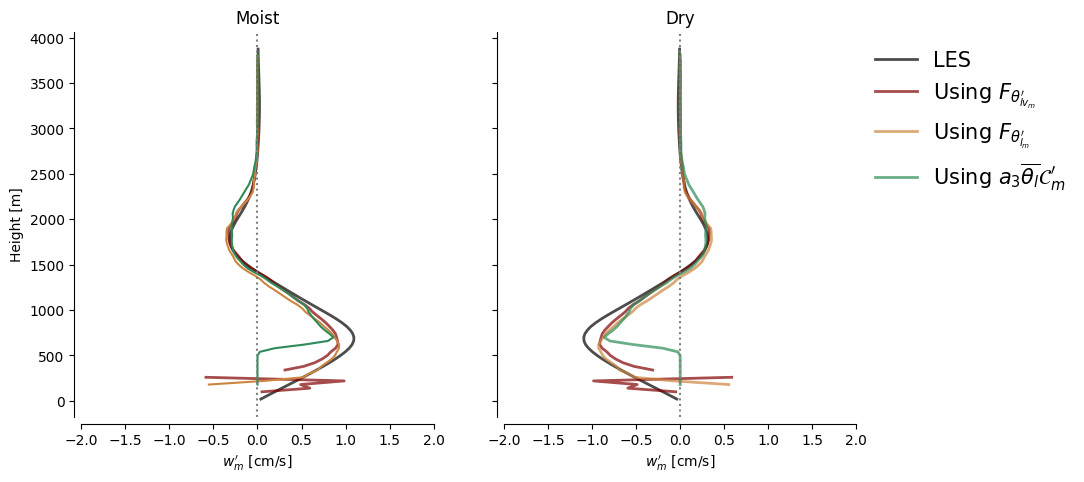

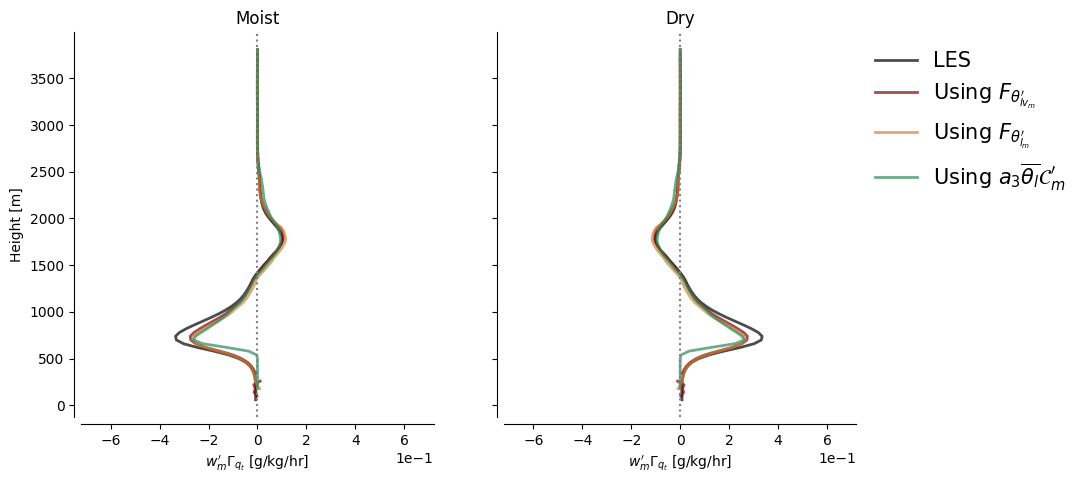

In [7]:
#%% WTG-based model of moisture variance production

tpltmin = 6.
tpltmax = 24.

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

labels0 = ["LES",
           r"Using $F_{\theta_{lv_m}'}$",
           r"Using $F_{\theta_{l_m}'}$",
           r"Using $a_3\overline{\theta_l}\mathcal{C}_m'$"
          ]

labels1 = ["LES",
           r"Using $F_{\theta_{lv_m}'}$",
           r"Using $F_{\theta_{l_m}'}$",
           r"Using $a_3\overline{\theta_l}\mathcal{C}_m'$"
          ]

colors = ['black',
          'maroon',
          'peru',
          'olive',
          'seagreen',
          ]
lw=2
alpha=0.7
fw = 100 # m/s => cm/s
fq = 1000*3600 # kg/kg/s => g/kg/hr
xlimw = 0.02*fw
xlimq = 2e-7*fq

# Vertical velocities

# Exact
wffmn_moist = np.mean(wff_moist_time[itpltmin:itpltmax],axis=0)
wffmn_dry = np.mean(wff_dry_time[itpltmin:itpltmax],axis=0)

# w model with actual thlvpf_vdiv (NO RADIATION/PRECIPITATION ASSUMED)
thlvpf_budg_moist = (-thlvpf_prod_moist_time[:,1:-1] - thlvpf_vdiv_moist_time[:,1:-1]
                      -thlvpf_hdiv_moist_time[:,1:-1] - thlvpf_subs_moist_time[:,1:-1]
                      +thlvpf_diff_moist_time)
thlvpf_resi_moist = thlvpf_tend_moist_time[:,1:-1] -  thlvpf_budg_moist
thlvpf_vdiv_moist = thlvpf_vdiv_moist_time[:,1:-1] #- thlvpf_resi_moist

thlvpf_budg_dry = (-thlvpf_prod_dry_time[:,1:-1] - thlvpf_vdiv_dry_time[:,1:-1]
                      -thlvpf_hdiv_dry_time[:,1:-1] - thlvpf_subs_dry_time[:,1:-1]
                      +thlvpf_diff_dry_time)
thlvpf_resi_dry = thlvpf_tend_dry_time[:,1:-1] -  thlvpf_budg_dry
thlvpf_vdiv_dry = thlvpf_vdiv_dry_time[:,1:-1] #- thlvpf_resi_dry


wff_moist_wtg = -thlvpf_vdiv_moist/Gamma_thlv[:,1:-1]
wff_dry_wtg = -thlvpf_vdiv_dry/Gamma_thlv[:,1:-1]

wffmn_moist_wtg = np.mean(wff_moist_wtg[itpltmin:itpltmax,:],axis=0)
wffmn_dry_wtg = np.mean(wff_dry_wtg[itpltmin:itpltmax,:],axis=0)

# w model with simple reliance on qtpf
wff_moist_mod = -qtpf_prod_moist_time/Gamma_qt
wff_dry_mod = -qtpf_prod_dry_time/Gamma_qt

wffmn_moist_mod = np.mean(wff_moist_mod[itpltmin:itpltmax,:],axis=0)
wffmn_dry_mod = np.mean(wff_dry_mod[itpltmin:itpltmax,:],axis=0)

# w model with thlpf_vdiv
thlpf_vdiv_moist_time = thlvpf_vdiv_moist_time - 0.608*thl_av_time[:,1:-1]*qtpf_vdiv_moist_time
thlpf_vdiv_dry_time = thlvpf_vdiv_dry_time - 0.608*thl_av_time[:,1:-1]*qtpf_vdiv_dry_time

Gamma_thl = (thl_av_time[:,1:] - thl_av_time[:,:-1])/dzh
Gamma_thl_f = (Gamma_thl[:,1:] + Gamma_thl[:,:-1])*0.5

wff_moist_thl = -thlpf_vdiv_moist_time/Gamma_thl_f
wff_dry_thl = -thlpf_vdiv_dry_time/Gamma_thl_f

wffmn_moist_thl = np.mean(wff_moist_thl[itpltmin:itpltmax,:],axis=0)
wffmn_dry_thl = np.mean(wff_dry_thl[itpltmin:itpltmax,:],axis=0)

# w model with qlpf_vdiv
wff_moist_ql = 7*thl_av_time[:,1:-1]*qlpf_vdiv_moist_time/Gamma_thl_f
wff_dry_ql = 7*thl_av_time[:,1:-1]*qlpf_vdiv_dry_time/Gamma_thl_f

wffmn_moist_ql =  np.mean(wff_moist_ql[itpltmin:itpltmax,:],axis=0)
wffmn_dry_ql =  np.mean(wff_dry_ql[itpltmin:itpltmax,:],axis=0)

# Moisture variance production
qtpfmn_prod_moist_wex = np.mean(qtpf_prod_moist_wex_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_dry_wex = np.mean(qtpf_prod_dry_wex_time[itpltmin:itpltmax,:],axis=0)

qtpfmn_prod_moist = np.mean(-qtpf_prod_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_dry = np.mean(-qtpf_prod_dry_time[itpltmin:itpltmax,:],axis=0)

qtpf_prod_moist_wtg_time = wff_moist_wtg*Gamma_qt[:,1:-1]
qtpf_prod_dry_wtg_time = wff_dry_wtg*Gamma_qt[:,1:-1]

qtpfmn_prod_moist_wtg = np.mean(qtpf_prod_moist_wtg_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_dry_wtg = np.mean(qtpf_prod_dry_wtg_time[itpltmin:itpltmax,:],axis=0)

qtpf_prod_moist_thl_time = wff_moist_thl*Gamma_qt
qtpf_prod_dry_thl_time = wff_dry_thl*Gamma_qt

qtpfmn_prod_moist_thl = np.mean(qtpf_prod_moist_thl_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_dry_thl = np.mean(qtpf_prod_dry_thl_time[itpltmin:itpltmax,:],axis=0)

qtpf_prod_moist_ql_time = wff_moist_ql*Gamma_qt
qtpf_prod_dry_ql_time = wff_dry_ql*Gamma_qt

qtpfmn_prod_moist_ql =  np.mean(qtpf_prod_moist_ql_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_dry_ql =  np.mean(qtpf_prod_dry_ql_time[itpltmin:itpltmax,:],axis=0)


# Set values that lie outside the plot to nan to avoid cluttering plot
wffmn_moist_wtg[np.abs(wffmn_moist_wtg)>xlimw/fw] = np.nan
wffmn_moist_thl[np.abs(wffmn_moist_thl)>xlimw/fw] = np.nan
wffmn_dry_wtg[np.abs(wffmn_dry_wtg)>xlimw/fw] = np.nan
wffmn_dry_thl[np.abs(wffmn_dry_thl)>xlimw/fw] = np.nan


# w plot
fig,axs = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(10,5),squeeze=False)
axs[0,0].plot(fw*wffmn_moist, zflim, c=colors[0],linewidth=lw,alpha=alpha)
axs[0,0].plot(fw*wffmn_moist_wtg, zflim[2:-2], c=colors[1],linewidth=lw,alpha=alpha)
axs[0,0].plot(fw*wffmn_moist_thl, zflim[1:-1], c=colors[2])
axs[0,0].plot(fw*wffmn_moist_ql, zflim[1:-1], c=colors[4])
# axs[0,0].plot(wffmn_moist_mod, zflim[1:-1], c='black',linestyle='-.')
axs[0,0].axvline(0,color='gray',linestyle='dotted')
axs[0,0].set_xlim((-xlimw,xlimw))
axs[0,0].set_xlabel(r"$w_m'$ [cm/s]")
axs[0,0].set_title(r"Moist")
# axs[0,0].annotate('a)', (0.05,0.9), xycoords='axes fraction', fontsize=14)
axs[0,0].ticklabel_format(style='sci',axis='x',scilimits=(0,0))

axs[0,1].plot(fw*wffmn_dry, zflim,  c=colors[0],linewidth=lw,alpha=alpha, label=labels0[0])
axs[0,1].plot(fw*wffmn_dry_wtg, zflim[2:-2],  c=colors[1],linewidth=lw,alpha=alpha, label=labels0[1])
axs[0,1].plot(fw*wffmn_dry_thl, zflim[1:-1],  c=colors[2],linewidth=lw,alpha=alpha, label=labels0[2])
axs[0,1].plot(fw*wffmn_dry_ql, zflim[1:-1],  c=colors[4],linewidth=lw,alpha=alpha, label=labels0[3])
# axs[0,1].plot(wffmn_dry_mod, zflim[1:-1], c='black',linestyle='-.')
axs[0,1].axvline(0,color='gray',linestyle='dotted')
axs[0,1].set_xlim((-xlimw,xlimw))
axs[0,1].set_xlabel(r"$w_m'$ [cm/s]")
axs[0,1].set_title(r"Dry")
# axs[0,1].annotate('b)', (0.05,0.9), xycoords='axes fraction', fontsize=14)
axs[0,1].ticklabel_format(style='sci',axis='x',scilimits=(0,0))

axs[0,0].set_ylabel(r'Height [m]')
axs[0,1].legend(loc='upper left',bbox_to_anchor=(1,1), frameon=False, fontsize=15)

sns.despine(offset=5)

plt.savefig(sp+'/wpf_wtg.pdf',bbox_inches='tight')

# Moisture variance production plot
fig,axs = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(10,5),squeeze=False)
axs[0,0].plot(fq*qtpfmn_prod_moist_wex, zflim[1:-1], c=colors[0],linewidth=lw,alpha=alpha)
axs[0,0].plot(fq*qtpfmn_prod_moist_wtg, zflim[2:-2], c=colors[1],linewidth=lw,alpha=alpha)
axs[0,0].plot(fq*qtpfmn_prod_moist_thl, zflim[1:-1], c=colors[2],linewidth=lw,alpha=alpha)
axs[0,0].plot(fq*qtpfmn_prod_moist_ql,  zflim[1:-1], c=colors[4],linewidth=lw,alpha=alpha)
# axs[0,0].plot(fq*qtpfmn_prod_moist, zflim[1:-1], c='black',linestyle='-.')
axs[0,0].axvline(0,color='gray',linestyle='dotted')
axs[0,0].set_xlim((-xlimq,xlimq))
axs[0,0].set_xlabel(r"$w_m'\Gamma_{q_t}$ [g/kg/hr]")
# axs[0,0].annotate('c)', (0.05,0.9), xycoords='axes fraction', fontsize=14)
axs[0,0].set_title(r"Moist")
axs[0,0].ticklabel_format(style='sci',axis='x',scilimits=(0,0))

axs[0,1].plot(fq*qtpfmn_prod_dry_wex, zflim[1:-1], c=colors[0],linewidth=lw,alpha=alpha,label=labels1[0])
axs[0,1].plot(fq*qtpfmn_prod_dry_wtg, zflim[2:-2], c=colors[1],linewidth=lw,alpha=alpha,label=labels1[1])
axs[0,1].plot(fq*qtpfmn_prod_dry_thl, zflim[1:-1], c=colors[2],linewidth=lw,alpha=alpha,label=labels1[2])
axs[0,1].plot(fq*qtpfmn_prod_dry_ql,  zflim[1:-1], c=colors[4],linewidth=lw,alpha=alpha,label=labels1[3])
axs[0,1].axvline(0,color='gray',linestyle='dotted')
axs[0,1].set_xlim((-xlimq,xlimq))
axs[0,1].set_xlabel(r"$w_m'\Gamma_{q_t}$ [g/kg/hr]")
axs[0,1].set_title(r"Dry")
# axs[0,1].annotate('d)', (0.05,0.9), xycoords='axes fraction', fontsize=14)
axs[0,1].ticklabel_format(style='sci',axis='x',scilimits=(0,0))

axs[0,0].set_ylabel(r'Height [m]')
axs[0,1].legend(loc='upper left',bbox_to_anchor=(1,1), frameon=False, fontsize=15)

sns.despine(offset=5)

plt.savefig(sp+'/qtpfprod_wtg.pdf',bbox_inches='tight')

/var/folders/2v/kjs6dspj31v39dztjqjqb_ym0000gn/T/ipykernel_11225/30202121.py:24: RuntimeWarning: divide by zero encountered in true_divide
  Gamrat = Gamma_qt/Gamma_thlv
/Users/martinjanssens/opt/anaconda3/envs/how_to_eurec4a/lib/python3.9/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in add
  ret = (d * (y[tuple(slice1)] + y[tuple(slice2)]) / 2.0).sum(axis)


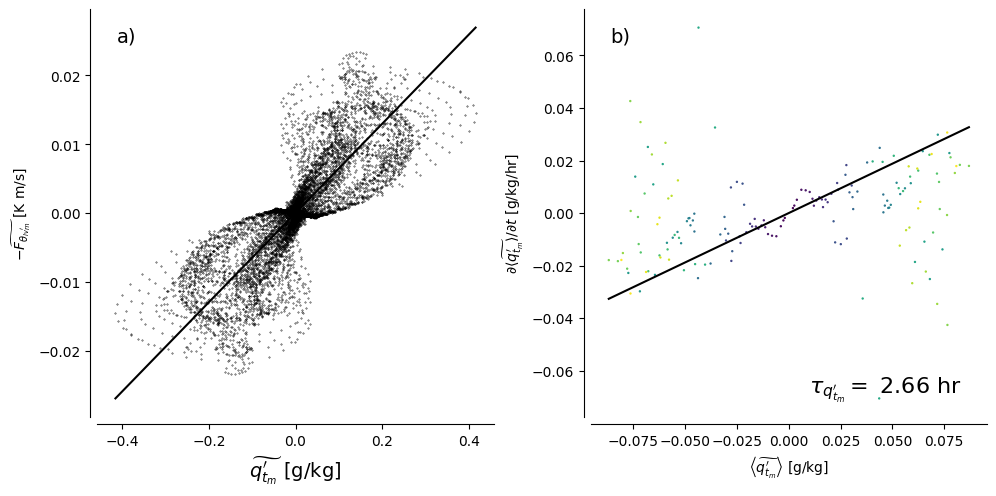

In [8]:
#%% Relation qtpf - wthlvpf_anom

tpltmin = 4.
tpltmax = 36.
C = 0.45 # Constant of proportionality
fs = 14 # fontsize
fqtp = 1000*3600 # kg/kg/s => g/kg/hr
fqt = 1000 # kg/kg => g/kg

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1
plttime_plt = np.arange(itpltmax-itpltmin)

itpltmin1d = np.where(time1d/3600>=tpltmin)[0][0]
itpltmax1d = np.where(time1d/3600<tpltmax)[0][-1]+1

# Calculate wstar from data
zwmax = 500
izwmax = np.where(zflim>zwmax)[0][0]
w2 = dl.load_w2tav(izmin, izmax)
wstar = np.sqrt(np.mean(w2[:,:izwmax]))

# gammas
Gamrat = Gamma_qt/Gamma_thlv
Gamratz = (Gamrat[:,1:] - Gamrat[:,:-1])/(zflim[1] - zflim[0])

# Time filter
wthlvpf_moist_anom_pl = -wthlvpf_moist_anom[itpltmin:itpltmax,:]
wthlvpf_dry_anom_pl = -wthlvpf_dry_anom[itpltmin:itpltmax,:]
qtpf_moist_pl = qtpf_moist_time[itpltmin:itpltmax,:]
qtpf_dry_pl = qtpf_dry_time[itpltmin:itpltmax,:]
Gamratz_pl = np.mean(Gamratz[itpltmin:itpltmax,:],axis=0)

# Model
qtpf_mod = np.linspace(qtpf_dry_pl.min(),qtpf_moist_pl.max(),10)
wthlvpf_anom_mod = C*wstar*thl0*qtpf_mod

# Vertically integrated model
qtpfi_moist = vint(qtpf_moist_time[itpltmin:itpltmax,:],rhobfi, zflim,plttime=plttime_plt,norm=True)
wthlvpf_anomi_moist = -vint(wthlvpf_moist_anom[itpltmin:itpltmax,2:-1]*Gamratz[itpltmin:itpltmax,:],rhobfi[2:-1], zflim[2:-1], plttime=plttime_plt,norm=True)
qtpfi_dry = vint(qtpf_dry_time[itpltmin:itpltmax,:],rhobfi, zflim,plttime=plttime_plt,norm=True)
wthlvpf_anomi_dry = -vint(wthlvpf_dry_anom[itpltmin:itpltmax,2:-1]*Gamratz[itpltmin:itpltmax,:],rhobfi[2:-1], zflim[2:-1], plttime=plttime_plt,norm=True)

# Tendency
qtpfi_tend_moist = vint(qtpf_tend_moist_time[itpltmin:itpltmax,:],rhobfi[1:-1],zflim[1:-1],plttime=plttime_plt,norm=True)
qtpfi_tend_dry = vint(qtpf_tend_dry_time[itpltmin:itpltmax,:],rhobfi[1:-1],zflim[1:-1],plttime=plttime_plt,norm=True)

# Gradient production
qtpfi_prod_moist = vint(qtpf_prod_moist_wex_time[itpltmin:itpltmax,:],rhobfi[1:-1],zflim[1:-1],plttime=plttime_plt,norm=True)
qtpfi_prod_dry = vint(qtpf_prod_dry_wex_time[itpltmin:itpltmax,:],rhobfi[1:-1],zflim[1:-1],plttime=plttime_plt,norm=True)

# Cloud layer-mean Gamratz
Gamratz_mn = np.mean(Gamratz_pl[20:40])
qtpfi_mod = np.linspace(qtpfi_dry.min(),qtpfi_moist.max(),10)
tau = 1. / (C*thl0*wstar*Gamratz_mn)
wthlvpf_anomi_mod = qtpfi_mod  / tau


fig,axs=plt.subplots(ncols=2,figsize=(10,5),squeeze=False)
axs[0,0].scatter(qtpf_moist_pl.flatten()*fqt,wthlvpf_moist_anom_pl.flatten(),c='k',s=0.1)
axs[0,0].scatter(qtpf_dry_pl.flatten()*fqt,wthlvpf_dry_anom_pl.flatten(),c='k',s=0.1)
axs[0,0].plot(qtpf_mod*fqt,wthlvpf_anom_mod,'k')
axs[0,0].set_ylabel(r"$-\widetilde{F_{{\theta_{lv}}_m'}}$ [K m/s]")
axs[0,0].set_xlabel(r"$\widetilde{q_{t_m}'}$ [g/kg]",fontsize=fs)
axs[0,0].annotate('a)', (0.05,0.92), xycoords='axes fraction', fontsize=14)

axs[0,1].scatter(qtpfi_moist*fqt,qtpfi_tend_moist*fqtp,c=plttime_plt,s=0.5)
axs[0,1].scatter(qtpfi_dry*fqt,qtpfi_tend_dry*fqtp,c=plttime_plt,s=0.5)
axs[0,1].plot(qtpfi_mod*fqt,wthlvpf_anomi_mod*fqtp,'k')
axs[0,1].set_ylabel(r"$\partial \langle \widetilde{q_{t_m}'} \rangle /\partial t$ [g/kg/hr]")
axs[0,1].set_xlabel(r"$\left\langle \widetilde{q_{t_m}'}\right\rangle$ [g/kg]")
axs[0,1].annotate(r"$\tau_{q_{t_m}'} =$ %.2f hr"%(tau/3600), (0.55,0.06), xycoords='axes fraction', fontsize=16)
axs[0,1].annotate('b)', (0.05,0.92), xycoords='axes fraction', fontsize=14)
plt.tight_layout()
sns.despine(offset=5)
plt.savefig(sp+'/qtpf_qtpfprod_model.png',dpi=300,bbox_inches='tight')
plt.show()


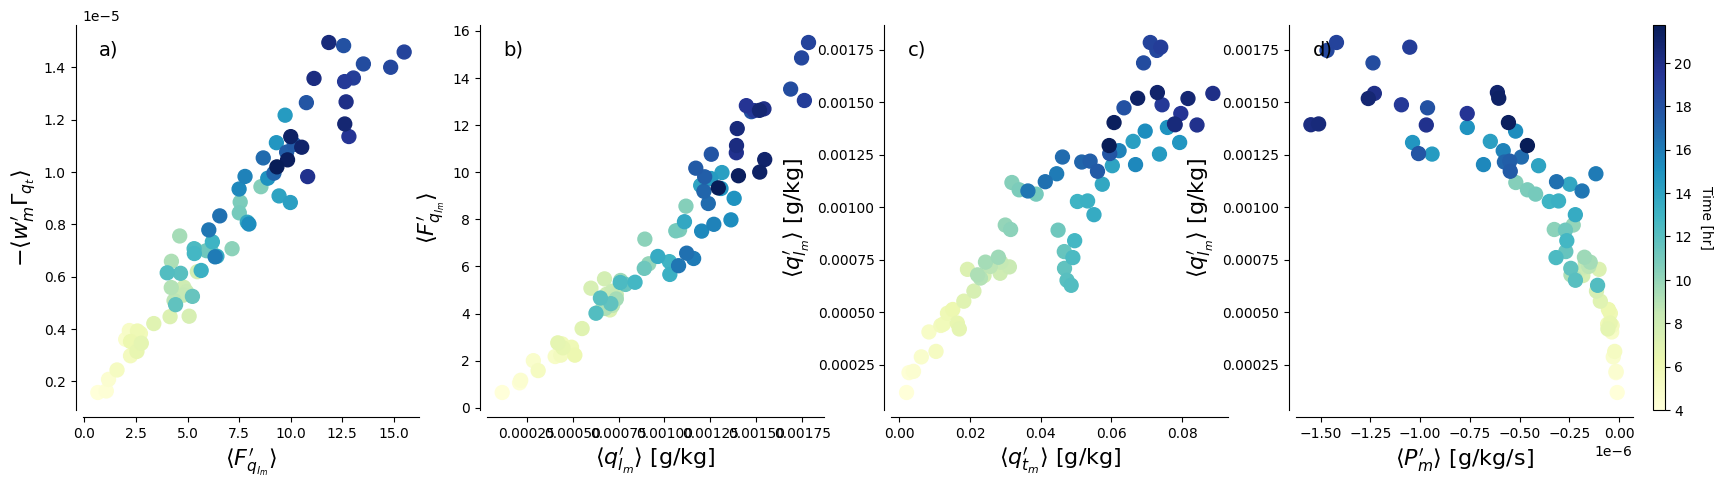

In [9]:
# And now to see if vertical integral of liquid water flux anomaly still remains proportional to vertically
# integrated liquid water anomaly

tpltmin = 4.
tpltmax = 22.
fs = 14 # fontsize
fqt = 1000 # kg/kg => g/kg
s = 100
cmap = 'YlGnBu'

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1
plttime_plt = np.arange(itpltmin, itpltmax)
wqlpf_anomi_moist = vint(wqlpf_moist_anom[:,1:-1],rhobfi[1:-1], zflim[1:-1], plttime=plttime_plt,norm=True)
wqlpf_anomi_dry = vint(wqlpf_dry_anom[:,1:-1],rhobfi[1:-1], zflim[1:-1], plttime=plttime_plt,norm=True)

qlpfi_moist = vint((qlpf_moist_time+qlpp_moist_time)[:,1:-1],rhobfi[1:-1], zflim[1:-1], plttime=plttime_plt,norm=True)
qlpfi_dry = vint((qlpf_dry_time+qlpp_dry_time)[:,1:-1],rhobfi[1:-1], zflim[1:-1], plttime=plttime_plt,norm=True)

qtpfi_moist = vint(qtpf_moist_time[:,1:-1],rhobfi[1:-1], zflim[1:-1], plttime=plttime_plt,norm=True)
qtpfi_dry = vint(qtpf_dry_time[:,1:-1],rhobfi[1:-1], zflim[1:-1], plttime=plttime_plt,norm=True)

qtpfi_prod_moist = vint(qtpf_prod_moist_wex_time,rhobfi[1:-1], zflim[1:-1], plttime=plttime_plt,norm=True)

qrpfi_moist = vint((qrpf_moist_time+qrpp_moist_time)[:,1:-1],rhobfi[1:-1], zflim[1:-1], plttime=plttime_plt,norm=True)
qrpfi_dry = vint((qrpf_dry_time+qrpp_dry_time)[:,1:-1],rhobfi[1:-1], zflim[1:-1], plttime=plttime_plt,norm=True)

qtpfi_micr_moist = vint(qtpf_micr_moist_time,rhobfi,zflim,plttime_plt,norm=True)
qtpfi_micr_dry = vint(qtpf_micr_dry_time,rhobfi,zflim,plttime_plt,norm=True)

fig,axs=plt.subplots(ncols=4,figsize=(20,5),squeeze=False)

axs[0,0].scatter(wqlpf_anomi_moist*fqtp,-qtpfi_prod_moist*fqt,c=plttime_plt,s=s,cmap=cmap)
axs[0,0].set_xlabel(r"$\langle F_{q_{l_m}}' \rangle$", fontsize=16)
axs[0,0].set_ylabel(r"$-\langle w_m' \Gamma_{q_t} \rangle$", fontsize=16)
axs[0,0].annotate('a)', (0.05,0.92), xycoords='axes fraction', fontsize=14)

axs[0,1].scatter(qlpfi_moist*fqt,wqlpf_anomi_moist*fqtp,c=plttime_plt,s=s,cmap=cmap)
axs[0,1].set_ylabel(r"$\langle F_{q_{l_m}}' \rangle$", fontsize=16)
axs[0,1].set_xlabel(r"$\langle q_{l_m}' \rangle$ [g/kg]", fontsize=16)
axs[0,1].annotate('b)', (0.05,0.92), xycoords='axes fraction', fontsize=14)

axs[0,2].scatter(qtpfi_moist*fqt,qlpfi_moist*fqt,c=time[plttime_plt],s=s,cmap=cmap)
# axs[0,1].scatter(qtpfi_dry*fqt,qlpfi_dry*fqt,c=plttime_plt,s=s,cmap=cmap)
# axs[0,1].scatter(qtpfi_moist*fqt,-qtpfi_micr_moist*fqt*1000,c=plttime_plt,s=s,cmap=cmap)
# axs[0,1].scatter(qtpfi_dry*fqt,qtpfi_micr_dry*fqt*1000,c=plttime_plt,s=s,cmap=cmap)
# axs[0,1].plot([np.min(qtpfi_moist*fqt),np.max(qtpfi_moist*fqt)], [0,0],c='k')
axs[0,2].set_ylabel(r"$\langle q_{l_m}' \rangle$ [g/kg]", fontsize=16)
axs[0,2].set_xlabel(r"$\langle q_{t_m}' \rangle$ [g/kg]", fontsize=16)
axs[0,2].annotate('c)', (0.05,0.92), xycoords='axes fraction', fontsize=14)

sc1 = axs[0,3].scatter(qtpfi_micr_moist*fqt,qlpfi_moist*fqt,c=time[plttime_plt],s=s,cmap=cmap)
# axs[0,2].plot([np.min(qtpfi_moist*fqt),np.max(qtpfi_moist*fqt)], [0,0],c='k')
axs[0,3].set_ylabel(r"$\langle q_{l_m}' \rangle$ [g/kg]", fontsize=16)
axs[0,3].set_xlabel(r"$\langle P_m' \rangle$ [g/kg/s]", fontsize=16)
axs[0,3].annotate('d)', (0.05,0.92), xycoords='axes fraction', fontsize=14)

sns.despine(offset=5)

pos1 = axs[0,2].get_position()
cbax1 = fig.add_axes([.91, pos1.ymin, 0.006, pos1.height])
cb1 = fig.colorbar(sc1, cax=cbax1)
cb1.ax.set_ylabel(r"Time [hr]", rotation=270, labelpad=15)

# axs[0,1].scatter(qtpfi_moist*fqt,qlpfi_moist*fqt,c=plttime_plt,s=0.5)
# axs[0,1].scatter(qtpfi_dry*fqt,qlpfi_dry*fqt,c=plttime_plt,s=0.5)
# axs[0,1].set_ylabel(r"$\langle q_{t_m}'' \rangle$")
# axs[0,1].set_xlabel(r"$\langle q_{l_m}' \rangle$ [g/kg]")
# axs[0,1].annotate('b)', (0.05,0.92), xycoords='axes fraction', fontsize=14)

# plt.tight_layout()

plt.savefig(sp+'/qlpf_Fqlpf_qtpf_qrpf.pdf',bbox_inches='tight')
plt.show()

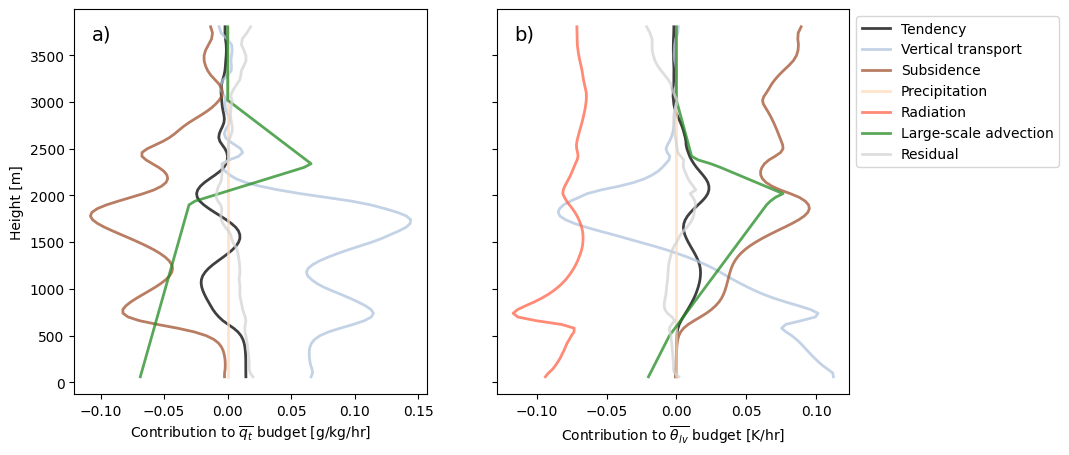

In [10]:
#%% Time-averaged, slab-averaged budget

tpltmin = 6.
tpltmax = 24.

terms = ['Tendency',
         'Vertical transport',
         'Subsidence',
         'Precipitation',
         'Radiation',
         'Large-scale advection',
         'Residual'
         ]

colors = ['black',
          'lightsteelblue',
          'sienna',
          'peachpuff',
          'tomato',
          'forestgreen',
          'lightgray'
          ]

fh = 3600 # => 1/s to 1/hr
fqh = 1000*3600 # kg/kg/s => g/kg/hr

itpltmin = np.where(time1d/3600>=tpltmin)[0][0]
itpltmax = np.where(time1d/3600<tpltmax)[0][-1]+1

qtav_tend = np.mean(ddt_qt_av_time[itpltmin:itpltmax,:],axis=0)
qtav_vdiv = np.mean(ddz_wqt_av_time[itpltmin:itpltmax,:],axis=0)
qtav_subs = np.mean(wfls_dqtdz_av_time[itpltmin:itpltmax,:],axis=0)
qtav_prec = np.mean(dqdt_prec[itpltmin:itpltmax,1:-1],axis=0)
qtav_larg = dqdt_ls[1:-1]
qtav_budg = -qtav_vdiv - qtav_subs + qtav_prec + qtav_larg
qtav_resi = qtav_tend - qtav_budg

thlvav_tend = np.mean(ddt_thlv_av_time[itpltmin:itpltmax,:],axis=0)
thlvav_vdiv = np.mean(ddz_wthlv_av_time[itpltmin:itpltmax,:],axis=0)
thlvav_subs = np.mean(wfls_dthlvdz_av_time[itpltmin:itpltmax,:],axis=0)
thlvav_prec = np.mean(dthlvdt_prec[itpltmin:itpltmax],axis=0)
thlvav_radi = np.mean(dthlvdt_radi[itpltmin:itpltmax,1:-1],axis=0)
thlvav_larg = np.mean(dthlvdt_ls[itpltmin:itpltmax,1:-1],axis=0)
thlvav_budg = -thlvav_vdiv - thlvav_subs + thlvav_prec + thlvav_radi + thlvav_larg
thlvav_resi = thlvav_tend - thlvav_budg

# thlvav_vdiv = thlvav_vdiv - thlvav_resi

# qlav_tend = np.mean(ddt_ql_av_time[itpltmin:itpltmax,:],axis=0)
# qlav_vdiv = np.mean(ddz_wql_av_time[itpltmin:itpltmax,:],axis=0)
# qlav_subs = np.mean(wfls_dqldz_av_time[itpltmin:itpltmax,:],axis=0)
# qlav_larg = np.zeros(qtav_larg.shape)
# qlav_sour = qlav_vdiv # Assuming condensation equals transport
# qlav_budg = -qlav_vdiv - qlav_subs + qlav_larg + qlav_sour
# qlav_resi = qlav_tend - qlav_budg

# ql_avi = np.mean(ql_av_1d[itpltmin:itpltmax,:],axis=0)
# z_cb = zflim[ql_avi>0][1]
# z_ib = zflim[np.argmax(np.mean(wql_av[itpltmin:itpltmax,:],axis=0))]
# z_ct = zflim[ql_avi>0][-28]

alpha = 0.75
lw = 2

fig,axs = plt.subplots(ncols=2,sharey=True,figsize=(10,5))
# fig.suptitle(colors)
axs[0].plot( qtav_tend*fqh, zflim[1:-1],c=colors[0],alpha=alpha,lw=lw)
axs[0].plot(-qtav_vdiv*fqh, zflim[1:-1],c=colors[1],alpha=alpha,lw=lw)
axs[0].plot(-qtav_subs*fqh, zflim[1:-1],c=colors[2],alpha=alpha,lw=lw)
axs[0].plot( qtav_prec*fqh, zflim[1:-1],c=colors[3],alpha=alpha,lw=lw)
axs[0].plot( qtav_larg*fqh, zflim[1:-1],c=colors[5],alpha=alpha,lw=lw)
axs[0].plot( qtav_resi*fqh, zflim[1:-1],c=colors[-1],alpha=alpha,lw=lw)
# axs[0].axhline(z_cb,color='k',linestyle='-',alpha=alpha-0.4)
# axs[0].axhline(z_ib,color='k',linestyle='-',alpha=alpha-0.4)
# axs[0].axhline(z_ct,color='k',linestyle='-',alpha=alpha-0.4)
axs[0].set_xlabel(r"Contribution to $\overline{q_t}$ budget [g/kg/hr]")
axs[0].annotate('a)', (0.05,0.92), xycoords='axes fraction', fontsize=14)

# axs[1].plot( thlvav_tend, zflim[1:-1],c=colors[0],label=terms[0],alpha=alpha,lw=lw)
# axs[1].plot(-thlvav_vdiv, zflim[1:-1],c=colors[1],label=terms[1],alpha=alpha,lw=lw)
# axs[1].plot(-thlvav_subs, zflim[1:-1],c=colors[2],label=terms[2],alpha=alpha,lw=lw)
# axs[1].plot( thlvav_larg, zflim[1:-1],c=colors[3],label=terms[3],alpha=alpha,lw=lw)
# axs[1].plot( thlvav_resi, zflim[1:-1],c=colors[-1],label='Residual')
# axs[1].set_xlabel(r"Contribution to $\overline{\theta_{lv}}$ tendency [K/s]")

axs[1].plot( thlvav_tend*fh, zflim[1:-1],c=colors[0],alpha=alpha,lw=lw,label=terms[0])
axs[1].plot(-thlvav_vdiv*fh, zflim[1:-1],c=colors[1],alpha=alpha,lw=lw,label=terms[1])
axs[1].plot(-thlvav_subs*fh, zflim[1:-1],c=colors[2],alpha=alpha,lw=lw,label=terms[2])
axs[1].plot( thlvav_prec*fh, zflim[1:-1],c=colors[3],alpha=alpha,lw=lw,label=terms[3])
axs[1].plot( thlvav_radi*fh, zflim[1:-1],c=colors[4],alpha=alpha,lw=lw,label=terms[4])
axs[1].plot( thlvav_larg*fh, zflim[1:-1],c=colors[5],alpha=alpha,lw=lw,label=terms[5])
axs[1].plot( thlvav_resi*fh, zflim[1:-1],c=colors[-1],alpha=alpha,lw=lw,label=terms[-1])
# axs[1].axhline(z_cb,color='k',linestyle='-',alpha=alpha-0.4)
# axs[1].axhline(z_ib,color='k',linestyle='-',alpha=alpha-0.4)
# axs[1].axhline(z_ct,color='k',linestyle='-',alpha=alpha-0.4)
axs[1].set_xlabel(r"Contribution to $\overline{\theta_{lv}}$ budget [K/hr]")
axs[1].annotate('b)', (0.05,0.92), xycoords='axes fraction', fontsize=14)

# axs[2].plot( qlav_tend*fqh, zflim[1:-1],c=colors[0],alpha=alpha,lw=lw,label=terms[0])
# axs[2].plot(-qlav_vdiv*fqh, zflim[1:-1],c=colors[1],alpha=alpha,lw=lw,label=terms[1])
# axs[2].plot(-qlav_subs*fqh, zflim[1:-1],c=colors[2],alpha=alpha,lw=lw,label=terms[2])
# axs[2].plot( qlav_larg*fqh, zflim[1:-1],c=colors[3],alpha=alpha,lw=lw,label=terms[3])
# axs[2].plot( qlav_sour*fqh, zflim[1:-1],c=colors[4],alpha=alpha,lw=lw,label=terms[4])
# axs[2].plot( qlav_resi*fqh, zflim[1:-1],c=colors[-1],alpha=alpha,lw=lw,label=terms[-1])
# axs[2].axhline(z_cb,color='k',linestyle='-',alpha=alpha-0.4)
# axs[2].axhline(z_ib,color='k',linestyle='-',alpha=alpha-0.4)
# axs[2].axhline(z_ct,color='k',linestyle='-',alpha=alpha-0.4)
# axs[2].set_xlabel(r"Contribution to $\overline{q_l}$ budget [g/kg/hr]")
# axs[2].annotate('c)', (0.05,0.92), xycoords='axes fraction', fontsize=14)

# axs[1].annotate(r"Cloud base",(4.8e-2,z_cb-150),annotation_clip=False)
# axs[1].annotate(r"Inversion base",(4.8e-2,z_ib-150),annotation_clip=False)
# axs[1].annotate(r"Cloud top",(4.8e-2,z_ct-150),annotation_clip=False)

axs[0].set_ylabel(r'Height [m]')
axs[1].legend(loc='best',bbox_to_anchor=(1,1))

plt.savefig(sp+'/slab_av_budget.pdf',bbox_inches='tight')

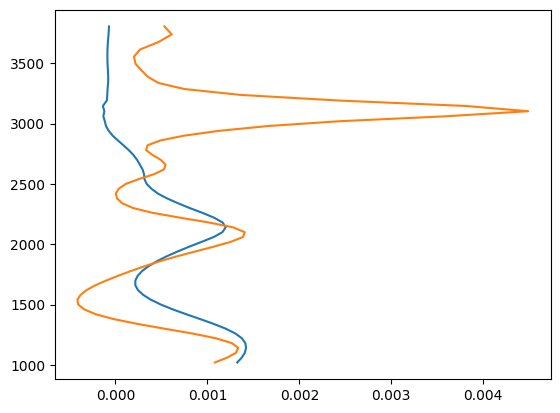

In [11]:
gam_thlv = np.mean(Gamma_thlv_1d[itpltmin:itpltmax,:],axis=0)
gam_qt = np.mean(Gamma_qt_1d[itpltmin:itpltmax,:],axis=0)

# additional wfls needed to compensate cooling
wfls_thlv_req = thlvav_tend/gam_thlv

# and to compensate moistening?
wfls_qt_req = qtav_tend/gam_qt

# plt.plot(-gam_thlv*wfls[izmin+1:izmax-1]*fh,zflim[1:-1])
# plt.plot(-thlvav_subs*fh, zflim[1:-1])

plt.plot(wfls_thlv_req[zflim[1:-1]>1000],(zflim[1:-1])[zflim[1:-1]>1000])
plt.plot(wfls_qt_req[zflim[1:-1]>1000],(zflim[1:-1])[zflim[1:-1]>1000])


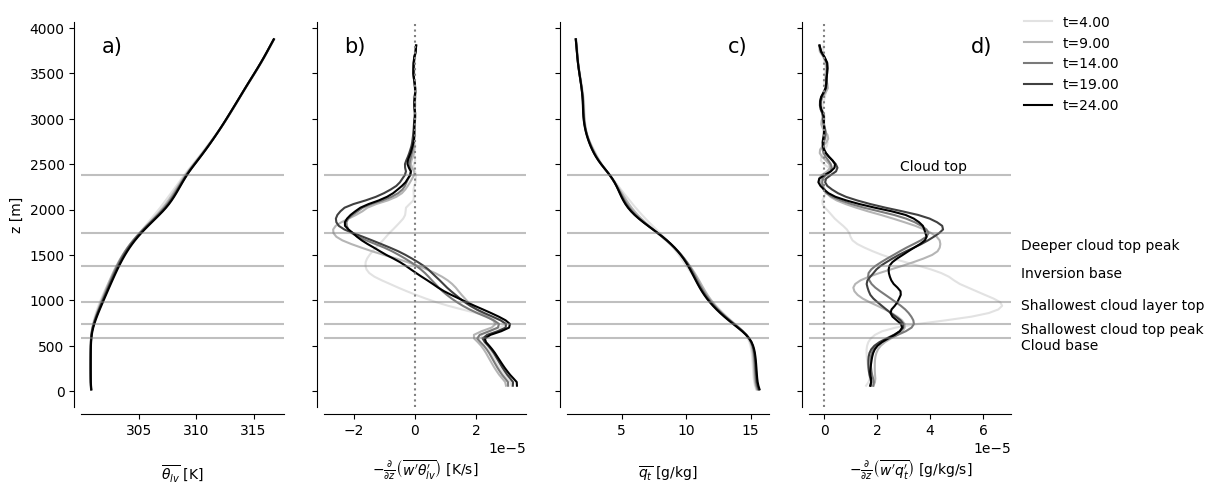

In [12]:
#%% Profiles of mean flux divergence
# cth = ds2d['cldtop'][:].data

tpltmin = 4.
tpltmax = 28.
dit = 5 # Rounds to closest multiple of dt in time
tav = 2.0
alpha=0.5
fq = 1e3

# lines settings
clines = 'gray'

# Font sizes
# update_fontsizes(14, 15, 16)

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1
idtplt = int(round(dit/(time[plttime[1]]-time[plttime[0]])))
plttime_var = np.arange(itpltmin,itpltmax,idtplt)

# Load eurec4a mean profiles


fig,axs = plt.subplots(ncols=4,sharey=True,figsize=(12,5),squeeze=False)
for i in range(len(plttime_var)):
    col = plt.cm.Greys((i+1)/len(plttime_var))
    
    # ppagg variables
    itmin = np.argmin(np.abs(time - (time[plttime_var[i]]-tav)))
    itmax = np.argmin(np.abs(time - (time[plttime_var[i]]+tav)))
    
    # 1D variables
    itmin1d = np.argmin(np.abs(time1d/3600 - (time[plttime_var[i]]-tav)))
    itmax1d = np.argmin(np.abs(time1d/3600 - (time[plttime_var[i]]+tav)))
    
    # State
    thlv_av = np.mean(thlv_av_time[itmin:itmax],axis=0)
    qt_av = fq*np.mean(qt_av_time[itmin:itmax],axis=0)
    
    # Flux divergence
    ddz_wthlv_av = np.mean(ddz_wthlv_av_time[itmin1d:itmax1d,:],axis=0)
    ddz_wqt_av = fq*np.mean(ddz_wqt_av_time[itmin1d:itmax1d,:],axis=0)

    # Net condensation
#     qlav_vdiv = np.mean(ddz_wql_av_time[itmin:itmax,:],axis=0) # Assuming condensation equals transport
         
    axs[0,0].plot(thlv_av, zflim, color=col,linestyle='-')
    
    axs[0,1].plot(-ddz_wthlv_av, zflim[1:-1], color=col,linestyle='-')

    axs[0,2].plot(qt_av, zflim, color=col,linestyle='-')
    
    axs[0,3].plot(-ddz_wqt_av, zflim[1:-1], color=col,linestyle='-',label='t=%.2f'%(time[plttime_var[i]]))
    
    if i == len(plttime_var) - 1:
        
        # Cloud base height
        icb = np.where(np.abs(np.mean(ql_av_1d[itmin:itmax,:],axis=0)) > 1e-9)[0][0]
        cblab = r"Cloud base"
        
        # Transition layer top (Fixed at 700m FIXME update with ALA's functions)
        itr = np.argmin(np.abs(zflim - 740))
        trlab = r"Shallowest cloud top peak"
        
        # Top of the layer populated by shallowest clouds (Fixed at 1000m)
        ish = np.argmin(np.abs(zflim - 1000))
        shlab = r"Shallowest cloud layer top"
        
        # Inversion base
        iib = np.argmin(np.abs(zflim - 1400))
        iblab = r"Inversion base"
        
        # Peak of cloud-top height of deeper clouds
        ict = np.argmin(np.abs(zflim - 1750))
        ctlab = r"Deeper cloud top peak"

        # Top of inversion
        iit = np.argmin(np.abs(zflim - 2400))
        itlab = r"Cloud top"
        
        axs[0,0].annotate('a)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[0,0].set_xlabel(r"$\overline{\theta_{lv}}$ [K]", labelpad=19)

        axs[0,1].annotate('b)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[0,1].axvline(0,color='gray',linestyle='dotted')
        axs[0,1].set_xlabel(r"$-\frac{\partial}{\partial z}\left(\overline{w'\theta_{lv}'}\right)$ [K/s]", labelpad=15)
        axs[0,1].ticklabel_format(style='sci',axis='x',scilimits=(0,0))

        axs[0,2].annotate('c)', (0.8,0.92), xycoords='axes fraction', fontsize=15)
        axs[0,2].set_xlabel(r"$\overline{q_t}$ [g/kg]", labelpad=19)

        axs[0,3].annotate('d)', (0.8,0.92), xycoords='axes fraction', fontsize=15)
        axs[0,3].axvline(0,color='gray',linestyle='dotted')
        axs[0,3].set_xlabel(r"$-\frac{\partial}{\partial z}\left(\overline{w'q_t'}\right)$ [g/kg/s]", labelpad=15)
        axs[0,3].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        
        for j in range(axs.shape[1]):
            axs[0,j].axhline(zflim[icb], c=clines, alpha=0.5)
            axs[0,j].axhline(zflim[itr], c=clines, alpha=0.5)
            axs[0,j].axhline(zflim[ish], c=clines, alpha=0.5)
            axs[0,j].axhline(zflim[iib], c=clines, alpha=0.5)
            axs[0,j].axhline(zflim[ict], c=clines, alpha=0.5)
            axs[0,j].axhline(zflim[iit], c=clines, alpha=0.5)
            
            if j == axs.shape[1]-1:
                axs[0,j].annotate(cblab, (1.05,zflim[icb]/zflim.max()), xycoords='axes fraction')
                axs[0,j].annotate(trlab, (1.05,zflim[itr]/zflim.max()), xycoords='axes fraction')
                axs[0,j].annotate(shlab, (1.05,zflim[ish]/zflim.max()), xycoords='axes fraction')
                axs[0,j].annotate(iblab, (1.05,zflim[iib]/zflim.max()-0.02), xycoords='axes fraction')
                axs[0,j].annotate(ctlab, (1.05,zflim[ict]/zflim.max()-0.04), xycoords='axes fraction')
                axs[0,j].annotate(itlab, (0.45,zflim[iit]/zflim.max()), xycoords='axes fraction')
            
axs[0,0].set_ylabel('z [m]')
axs[0,3].legend(loc='upper left',bbox_to_anchor=(1,1.05),ncol=len(plttime_var)//13+1, frameon=False)
sns.despine(offset=5)
plt.savefig(sp+'/convexity.pdf',bbox_inches='tight')
# update_fontsizes(small_font, mediu_font, large_font)

In [13]:
# open profiles dataset


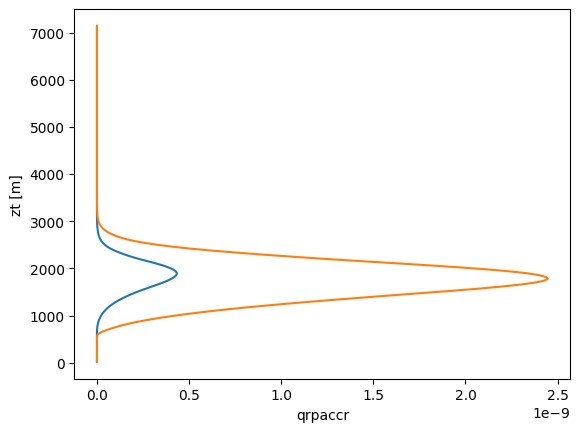

In [6]:
import xarray as xr
trange = slice('2020-02-01 10:00:00', '2020-02-01 23:00:00')
ds1 = xr.open_dataset(lp+'/../profiles.001.nc')
ds1

# These two are almost exactly the same
# ds1['wsv002t'].sel(time=trange).mean('time').differentiate('zm').plot(y='zm')
# ds1['qrptot'].sel(time=trange).mean('time').plot(y='zt')

# How about just the resolved flux?
# ds1['wsv002r'].sel(time=trange).mean('time').differentiate('zm').plot(y='zm')
# Still not bad!

# But not all terms add up to the microphysical source term in the qt budget, because you have to consider sedimentation!
# # ds1['qrptot'].sel(time=trange).mean('time').plot(y='zt')
# (ds1['qrptot']-ds1['qrpsed']).sel(time=trange).mean('time').plot(y='zt')
# ((ds1['qrpaccr']+ds1['qrpauto']+ds1['qrpevap'])*3600*24).sel(time=trange).mean('time').plot(y='zt')

# These two aren't the same at all!

# These are the same, but opposite in the qtp budget
# ds1['qrptot'].sel(time=trange).mean('time').plot(y='zt')
ds1['qrpauto'].sel(time=trange).mean('time').plot(y='zt')
ds1['qrpaccr'].sel(time=trange).mean('time').plot(y='zt')
# ds1['qrpevap'].sel(time=trange).mean('time').plot(y='zt')
# ds1['qrpsed'].sel(time=trange).mean('time').plot(y='zt')

# And this is zero, unfortunately, so we can't use it to check the sedimentation term
# ds1['qtpsed'].sel(time=trange).mean('time').plot(y='zt')

# Can I reconstruct qrpsed?
# No, I need Nr for that...
# What is nr?
# Estimate for Dvr (averaged!)
# ((ds1['rhobf']/0.998e3/np.pi*ds1['sv002']/ds1['nrrain'])**(1/3)).sel(time=trange).mean('time').plot(y='zt')

# Any evidence at all that sedimentation scales with qr?

# plt.plot(-qtpf_micr_moist_time.mean(axis=0)*500, zflim)
# (ds1['sv002']*0.001).sel(time=trange).mean('time').plot(y='zt')
# (ds1['qrpsed'].sel(time=trange).mean('time')*-300).plot(y='zt')


In [96]:
ds1['qrpaccr'].sel(time=trange).mean('time').max() / ds1['qrptot'].sel(time=trange).mean('time').max()


<xarray.DataArray ()>
array(3.76407378)

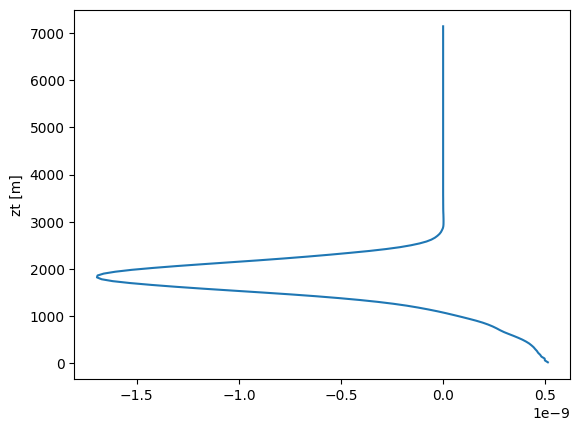

In [98]:
((ds1['qrpauto'] + ds1['qrpaccr'] + ds1['qrpevap'])*(-1)).sel(time=trange).mean('time').plot(y='zt')